# **Python libraries**

Here we install some libraries

In [1]:
%pip install pycaret mlflow

Here we import libraries

In [2]:
import math
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns
import pandas as pd
import numpy as np
from ipywidgets import interactive
from scipy.stats import linregress,norm
from scipy.optimize import curve_fit
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans, DBSCAN, HDBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,r2_score, root_mean_squared_log_error
from pycaret.regression import *

# **Predictions with graph topological properties**

## **Descriptive Statistics**

In [4]:
data_graphs=pd.read_csv("/content/drive/MyDrive/Artículo Fernanda Saviñón/Archivos csv/All.csv")
data_graphs.head()

Name                                             SMILES  Estado  \
0  abietic acid  CC(C)C1=CC2=CC[C@@H]3[C@@]([C@H]2CC1)(CCC[C@@]...       1   
1  acenaphthene                            C1CC2=CC=CC3=C2C1=CC=C3       2   
2        acetal                                         CCOC(C)OCC       3   
3  acetaldehyde                                               CC=O       1   
4     acetamide                                            CC(=O)N       2   

     Degree       Bet     Eigen     Closs     Estrada  Wiener  Gutman  \
0  2.076923  0.087089  0.106051  0.193297  133.219993    7100   26048   
1  2.181818  0.123160  0.187248  0.297329   56.953140     800    3203   
2  1.909091  0.154329  0.187516  0.253346   52.650084     944    2873   
3  1.714286  0.200000  0.350527  0.522632   15.326358      42      90   
4  1.777778  0.198413  0.304505  0.436147   20.109140      86     208   

       Enthalpy  
0  10960.527550  
1   6013.523824  
2   3566.534587  
3   1100.636618  
4    999.599324

In [5]:
data_graphs.describe().T #Descriptive statistics

count          mean           std        min          25%  \
Estado    3477.0      2.595916      0.664153   1.000000     2.000000   
Degree    3477.0      1.937904      0.075280   1.333333     1.900000   
Bet       3477.0      0.135514      0.024577   0.087089     0.119304   
Eigen     3477.0      0.175890      0.058167   0.039394     0.136542   
Closs     3477.0      0.264077      0.093969   0.068109     0.211704   
Estrada   3477.0     74.709739     50.879140   5.356367    42.668176   
Wiener    3477.0   5374.256543  14373.191210   4.000000   481.000000   
Gutman    3477.0  19122.032212  53544.096843   6.000000  1440.000000   
Enthalpy  3477.0   5904.664718   4180.527631  31.598123  3137.616774   

                  50%          75%            max  
Estado       3.000000     3.000000       3.000000  
Degree       1.942857     2.000000       2.230769  
Bet          0.130357     0.147467       0.333333  
Eigen        0.169366     0.208577       0.569036  
Closs        0.261240     0.319688       0.777778  
Estrada     60.512784    88.068181     324.032377  
Wiener    1192.000000  3133.000000  120057.000000  
Gutman    3855.000000  9960.000000  458340.000000  
Enthalpy  4926.258889  7342.162186   25635.330480

Text(698.7027777777779, 0.5, '$Spearman$ $Correlation$')

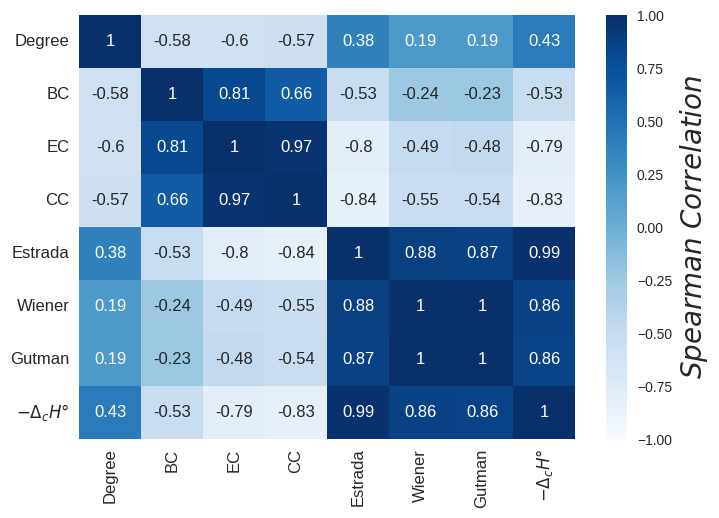

In [7]:
#Correlation Matrix
plt.tick_params(labelsize=12)
ax=sns.heatmap(data_graphs.drop(["Name","SMILES","Estado"],axis=1).corr(method="pearson"),vmin=-1,vmax=1,annot=True, cmap="Blues")
ax.set_xticklabels(['Degree', 'BC', 'EC', 'CC', 'Estrada', 'Wiener',"Gutman",r"$-\Delta_cH°$"])
ax.set_yticklabels(['Degree', 'BC', 'EC', 'CC', 'Estrada', 'Wiener',"Gutman",r"$-\Delta_cH°$"])
ax.figure.axes[-1].set_ylabel(r'$Spearman$ $Correlation$', size=20)
#plt.savefig("Correlation_spearman.png", dpi=500, bbox_inches='tight', pad_inches=0.1)

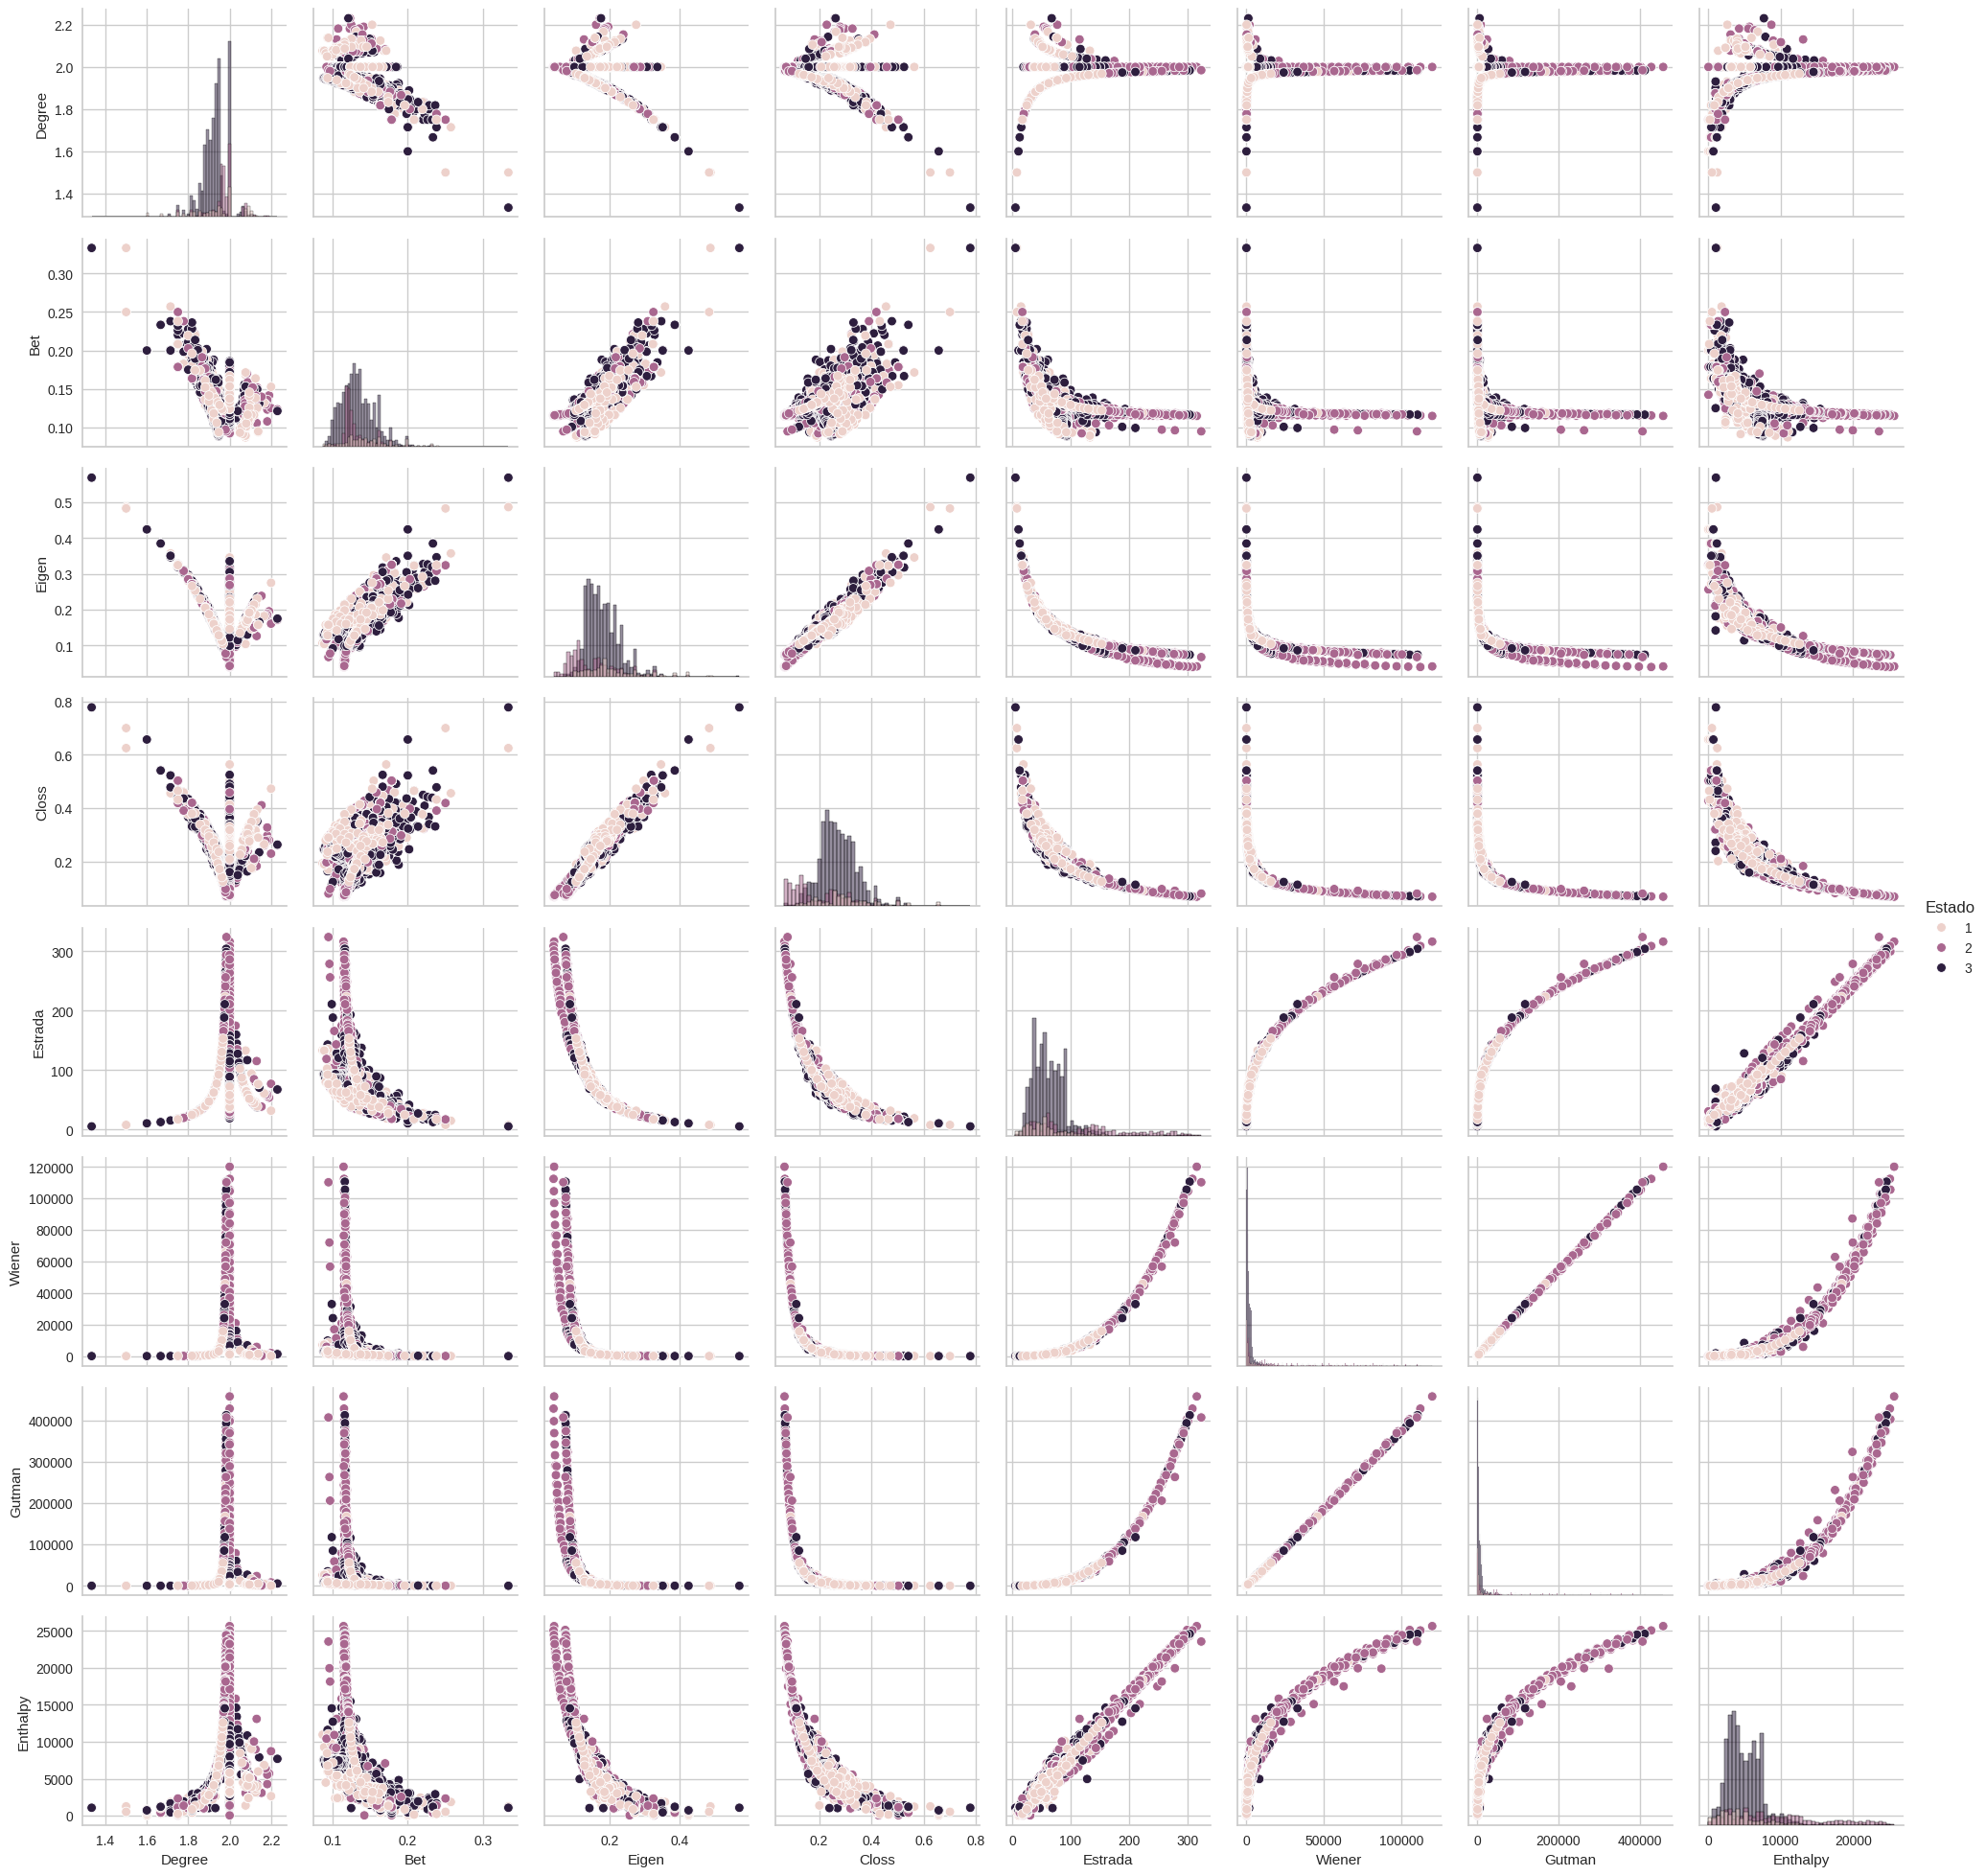

In [ ]:
g=sns.PairGrid(data_graphs.drop(["Name","SMILES"],axis=1),hue="Estado")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

## **Regressions**

### **Enthalpy vs Estrada index**

Here we study the dependence of standard combustion enthalpy as a function of the Estrada index.

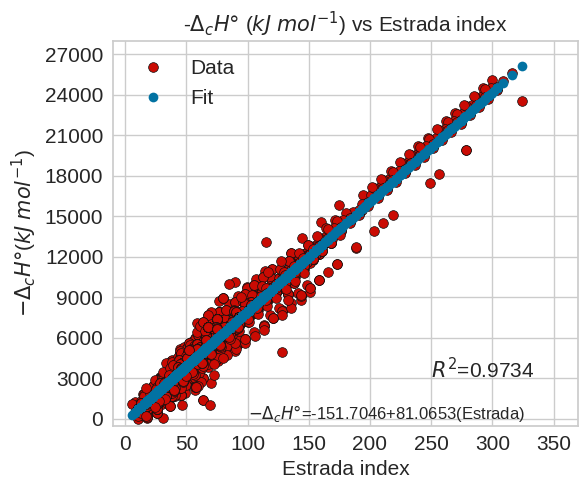

In [8]:
from matplotlib.ticker import ScalarFormatter
reg_estrada=linregress(data_graphs.Estrada,data_graphs.Enthalpy)
plt.figure(figsize=(6,5))
plt.plot(data_graphs.Estrada,data_graphs.Enthalpy,"ro", markeredgecolor="k", markeredgewidth=0.5, label="Data")
plt.title(r"-$\Delta_c H°$ ($kJ$ $mol^{-1}$) vs Estrada index",size=15)
plt.ylabel(r"$-\Delta_c H°$($kJ$ $mol^{-1}$)",size=15)
plt.plot(data_graphs.Estrada,reg_estrada.intercept+reg_estrada.slope*data_graphs.Estrada,
         "bo", linewidth=3, label="Fit")
plt.xlabel("Estrada index",size=15)
plt.legend(loc="best",prop={"size":15})
plt.tick_params(labelsize=15)
plt.xticks(np.arange(0,400,50))
plt.yticks(np.arange(0,30000,3000))
plt.xlim(-10,370)
plt.ylim(-500,28000)
plt.text(250,3000,r"$R^2$={}".format(round(reg_estrada.rvalue**2,4)),size=15)
plt.text(100,0,r"$-\Delta_c H°$={}+{}(Estrada)".format(round(reg_estrada.intercept,4),round(reg_estrada.slope,4)),size=12)
plt.grid(visible=True)
#plt.savefig("Estrada_indexvsEnthalpy.png", dpi=500, bbox_inches='tight', pad_inches=0.1)
plt.show()

### **Enthalpy vs Wiener index**

Here we study the dependence of standard combustion enthalpy as a function of the Wiener index.

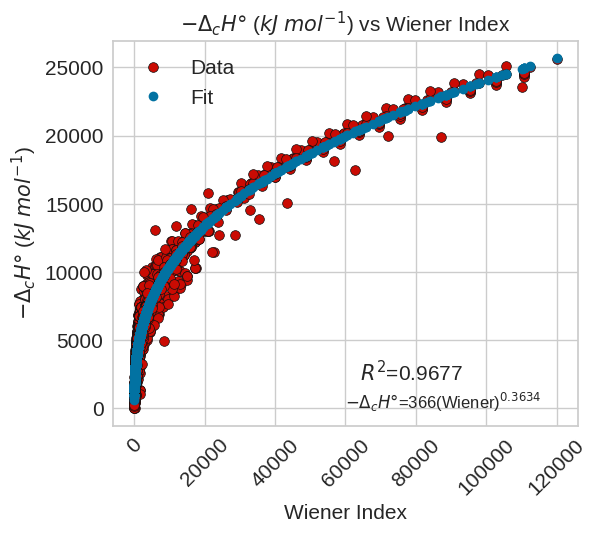

In [9]:
def wiener(x,a,b):
  return a*x**b

parametros_wiener,pcov=curve_fit(wiener,data_graphs.Wiener,data_graphs.Enthalpy)
r2_wiener=r2_score(data_graphs.Enthalpy, wiener(data_graphs.Wiener,*parametros_wiener))
plt.figure(figsize=(6,5))
plt.plot(data_graphs.Wiener,data_graphs.Enthalpy,"ro",markeredgecolor="k", markeredgewidth=0.5, label="Data")
plt.title(r"$-\Delta_c H°$ ($kJ$ $mol^{-1}$) vs Wiener Index",size=15)
plt.ylabel(r"$-\Delta_c H°$ ($kJ$ $mol^{-1}$)",size=15)
plt.plot(data_graphs.Wiener,wiener(data_graphs.Wiener,*parametros_wiener),
         "bo", linewidth=3, label="Fit")
plt.xlabel("Wiener Index",size=15)
plt.legend(loc="best",prop={"size":15})
plt.tick_params(labelsize=15)
plt.xticks(np.arange(0,140000, 20000),rotation=45)
plt.text(64000,2000,r"$R^2$={}".format(round(r2_wiener,4)),size=15)
plt.text(60000,0,r"$-\Delta_c H°$=366(Wiener)$^{0.3634}$",size=12)
plt.grid(visible=True)
#plt.savefig("Wiener_indexvsEnthalpy.png", dpi=500, bbox_inches='tight', pad_inches=0.1)
plt.show()

### **Enthalpy vs Gutman index**

Here we study the dependence of standard combustion enthalpy as a function of the Gutman index.

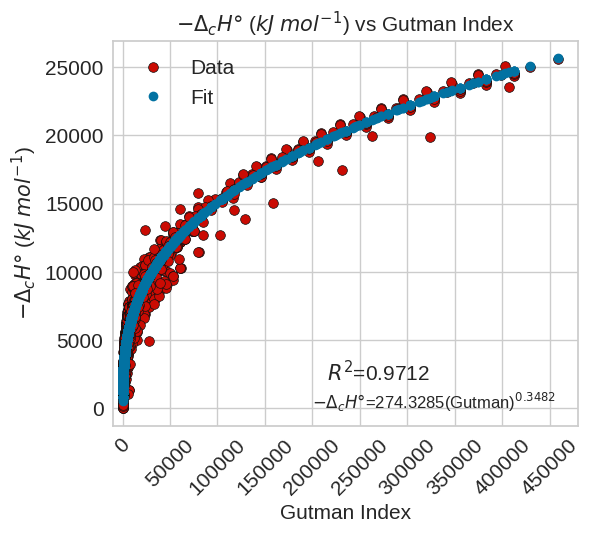

In [10]:
def gutman(x,a,b):
  return a*x**b

parametros_gutman,pcov=curve_fit(gutman,data_graphs.Gutman,data_graphs.Enthalpy)
r2_gutman=r2_score(data_graphs.Enthalpy, gutman(data_graphs.Gutman,*parametros_gutman))
plt.figure(figsize=(6,5))
plt.tick_params(labelsize=15)
plt.plot(data_graphs.Gutman,data_graphs.Enthalpy,"ro",markeredgecolor="k", markeredgewidth=0.5, label="Data")
plt.title(r"$-\Delta_c H°$ ($kJ$ $mol^{-1}$) vs Gutman Index",size=15)
plt.ylabel(r"$-\Delta_cH°$ ($kJ$ $mol^{-1}$)",size=15)
plt.plot(data_graphs.Gutman,gutman(data_graphs.Gutman,*parametros_gutman),
         "bo", linewidth=3, label="Fit")
plt.xlabel("Gutman Index",size=15)
plt.xticks(np.arange(0,550000, 50000), rotation=45)
plt.xlim(-10000,480000)
plt.legend(loc="best",prop={"size":15})
plt.text(215000,2000,r"$R^2$={}".format(round(r2_gutman,4)),size=15)
plt.text(200000,0,r"$-\Delta_cH°$=274.3285(Gutman)$^{0.3482}$",size=12)
plt.grid(visible=True)
#plt.savefig("Gutman_indexvsEnthalpy.png", dpi=500, bbox_inches='tight', pad_inches=0.1)
plt.show()

# **Multiple Linear Regression**

Here we perform a multiple linear regression to study the dependence of standard combustion enthalpy as a function of the previous topological indices.

In [11]:
from statsmodels.formula.api import ols
model=ols(formula="Enthalpy~Estrada+Wiener+Gutman",data=data_graphs).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Enthalpy   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                 4.718e+04
Date:                Fri, 23 May 2025   Prob (F-statistic):               0.00
Time:                        00:35:30   Log-Likelihood:                -27437.
No. Observations:                3477   AIC:                         5.488e+04
Df Residuals:                    3473   BIC:                         5.491e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -417.6882     31.442    -13.285      0.0

# **Supervied Learning**

Standard combustion enthalpy prediction using topological indices as predictor variables.

In [12]:
data_graphs=pd.read_csv("/content/drive/MyDrive/Artículo Fernanda Saviñón/Archivos csv/All.csv")
data_graphs.head()

Name                                             SMILES  Estado  \
0  abietic acid  CC(C)C1=CC2=CC[C@@H]3[C@@]([C@H]2CC1)(CCC[C@@]...       1   
1  acenaphthene                            C1CC2=CC=CC3=C2C1=CC=C3       2   
2        acetal                                         CCOC(C)OCC       3   
3  acetaldehyde                                               CC=O       1   
4     acetamide                                            CC(=O)N       2   

     Degree       Bet     Eigen     Closs     Estrada  Wiener  Gutman  \
0  2.076923  0.087089  0.106051  0.193297  133.219993    7100   26048   
1  2.181818  0.123160  0.187248  0.297329   56.953140     800    3203   
2  1.909091  0.154329  0.187516  0.253346   52.650084     944    2873   
3  1.714286  0.200000  0.350527  0.522632   15.326358      42      90   
4  1.777778  0.198413  0.304505  0.436147   20.109140      86     208   

       Enthalpy  
0  10960.527550  
1   6013.523824  
2   3566.534587  
3   1100.636618  
4    999.599324

## Multiple models of Machine Learning##

In [ ]:
"""
We configure to train and validate multiple ML models
"""
data=data_graphs.drop(["Name","SMILES","Enthalpy"],axis=1)
scaler=StandardScaler()
scaler.fit(data)
data_predictors_scaled=scaler.transform(data)
reg = setup(data_predictors_scaled, target = data_graphs.Enthalpy,
            session_id=123,
            train_size=0.7,
            log_experiment=True,
            experiment_name='Enthalpypredictions',
            fold_strategy="kfold",
            fold=10,
            data_split_shuffle=True,
            fold_shuffle=True)

In [ ]:
"""
We train and validate the different models
Here are the evaluation metrics for the validation process.
"""
best_model = compare_models(cross_validation=True,
                            fold=10)

Processing:   0%|          | 0/81 [00:00<?, ?it/s]

2024/11/18 05:22:42 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/11/18 05:22:43 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/11/18 05:22:43 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/11/18 05:22:44 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/11/18 05:22:44 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/11/18 05:22:45 

In [ ]:
"""
Here you get the evaluation metrics for the test using the best model
"""
reg.predict_model(best_model)

feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
2653  -0.897386   0.824986  -0.524769  -1.242952  -1.450354   1.463873   
1006   0.608507   0.125741  -0.999471  -0.778993  -0.603511   0.366753   
1724   0.608507  -0.738033   0.110740   0.592097   0.778490  -0.669557   
554    0.608507   0.125741  -0.304844  -0.683010  -0.848007   0.366667   
85     0.608507  -0.503580  -0.160130   0.264971   0.462711  -0.521518   
...         ...        ...        ...        ...        ...        ...   
3236  -0.897386   1.809110  -0.501470  -0.162017  -0.112187  -0.145195   
2963   0.608507  -1.072966   0.746001   1.044667   1.065093  -0.817637   
1049   0.608507   0.065805  -0.733286  -0.647208  -0.557369   0.218715   
3429  -2.403279  -0.005368  -0.102412  -0.491992  -0.600791   0.061983   
2867   0.608507  -0.005368  -1.264694  -0.523575  -0.154427   0.070764   

      feature_7  feature_8      Enthalpy  prediction_label  
2653   0.625125   0.628058  12898.884766      12251.556753  
1006  -0.129653  -0.146686   7527.243164       7527.219253  
1724  -0.344876  -0.335810   3145.508545       2966.772212  
554   -0.099593  -0.114409   7230.343750       7207.334517  
85    -0.329428  -0.323201   3729.808350       3685.033155  
...         ...        ...           ...               ...  
3236  -0.274318  -0.260907   6806.784668       6806.784668  
2963  -0.355940  -0.344383   2266.634766       2305.656402  
1049  -0.172029  -0.184174   6914.451660       6914.479717  
3429  -0.201742  -0.208737   6079.299805       5709.470768  
2867  -0.231315  -0.240491   6302.780273       6300.791855  

[1044 rows x 10 columns]

In [ ]:
best_model.score(reg.X_train,reg.y_train)

0.9970174753393639

### **Plots for best model**

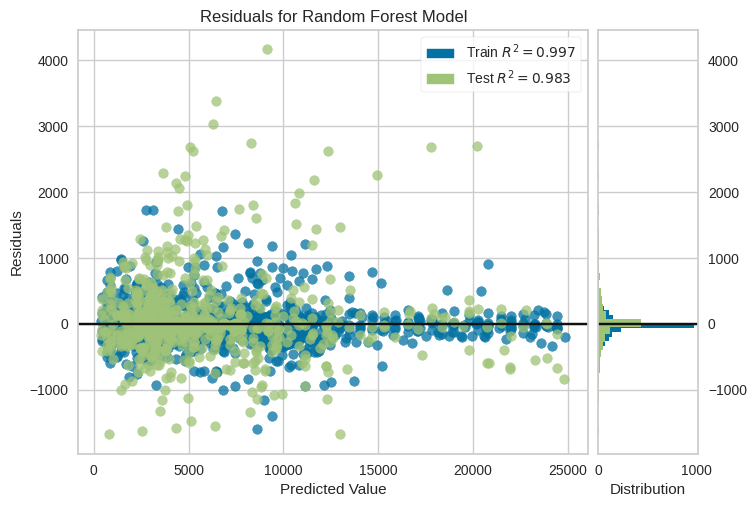

In [ ]:
reg.plot_model(best_model, plot = 'residuals', scale=1, plot_kwargs={"title":"Residuals for Random Forest Model"})



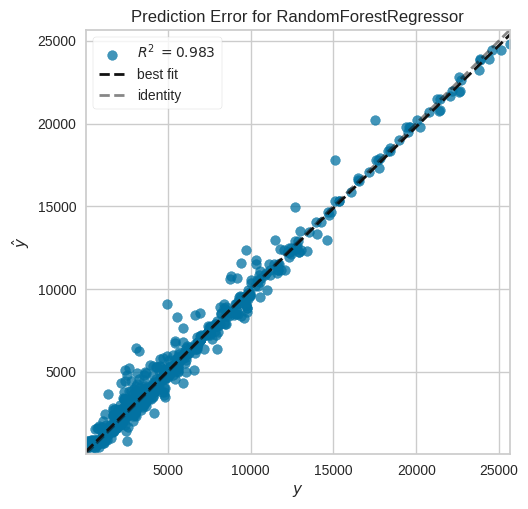

In [ ]:
reg.plot_model(best_model, plot ="error")

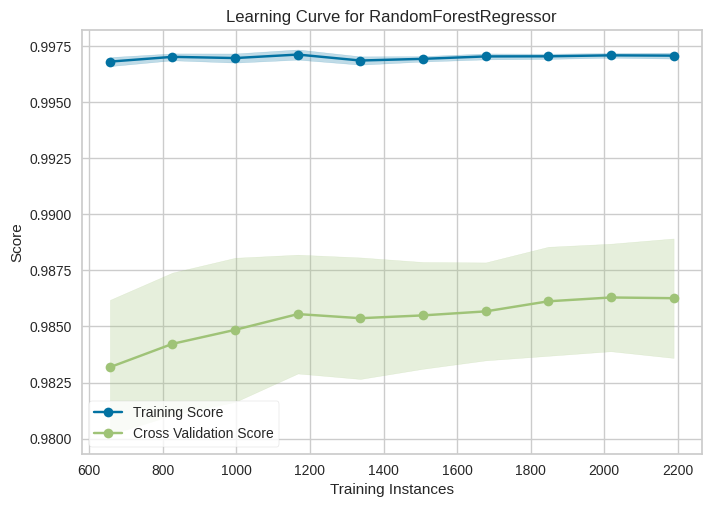

In [ ]:
reg.plot_model(best_model, plot ="learning")

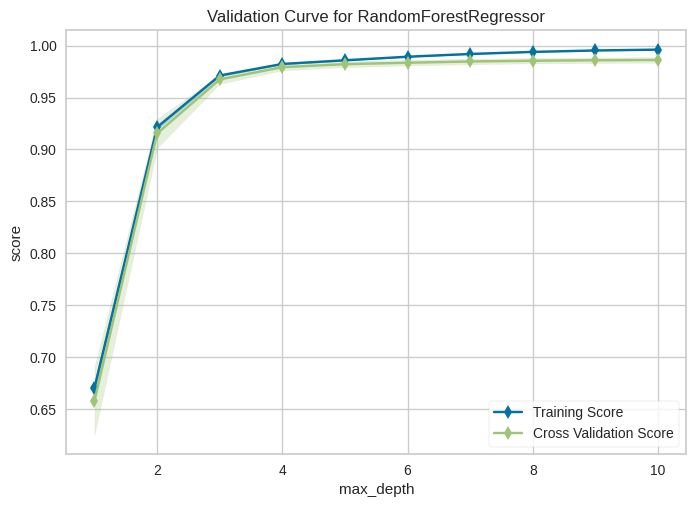

In [ ]:
reg.plot_model(best_model, plot = 'vc', )

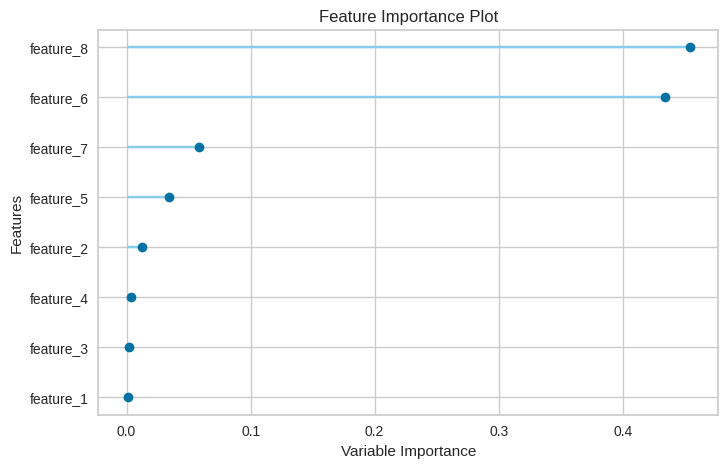

In [ ]:
reg.plot_model(best_model, plot = 'feature')

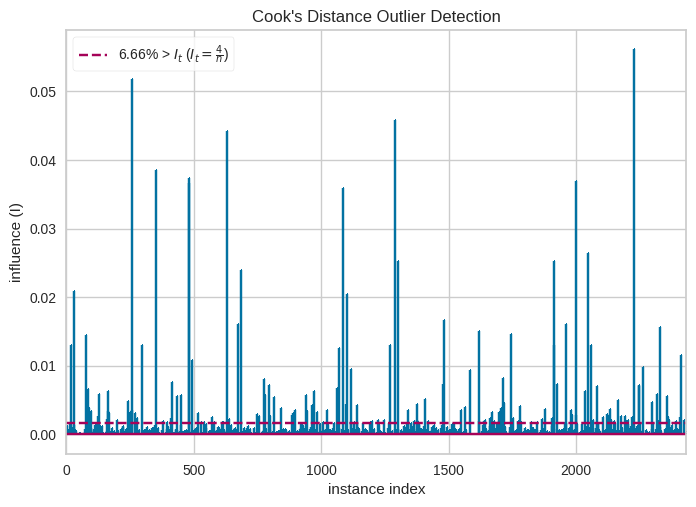

In [ ]:
reg.plot_model(best_model, plot = 'cooks')

## **Tuned Random Forest**

In [ ]:
data_graphs.head()

Name                                             SMILES  Estado  \
0  abietic acid  CC(C)C1=CC2=CC[C@@H]3[C@@]([C@H]2CC1)(CCC[C@@]...       1   
1  acenaphthene                            C1CC2=CC=CC3=C2C1=CC=C3       2   
2        acetal                                         CCOC(C)OCC       3   
3  acetaldehyde                                               CC=O       1   
4     acetamide                                            CC(=O)N       2   

     Degree       Bet     Eigen     Closs     Estrada  Wiener  Gutman  \
0  2.076923  0.087089  0.106051  0.193297  133.219993    7100   26048   
1  2.181818  0.123160  0.187248  0.297329   56.953140     800    3203   
2  1.909091  0.154329  0.187516  0.253346   52.650084     944    2873   
3  1.714286  0.200000  0.350527  0.522632   15.326358      42      90   
4  1.777778  0.198413  0.304505  0.436147   20.109140      86     208   

       Enthalpy  
0  10960.527550  
1   6013.523824  
2   3566.534587  
3   1100.636618  
4    999.599324

In [ ]:
data=data_graphs.drop(["Name","SMILES","Estado", "Degree","Bet","Eigen","Closs","Enthalpy"],axis=1)
scaler=StandardScaler()
scaler.fit(data)
data_predictors_scaled=scaler.transform(data)
reg = setup(data_predictors_scaled, target = data_graphs.Enthalpy,
            session_id=123,
            train_size=0.7,
            log_experiment=True,
            experiment_name='Enthalpypredictions',
            fold_strategy="kfold",
            fold=10,
            data_split_shuffle=True,
            fold_shuffle=True)

In [ ]:
best_model = compare_models(cross_validation=True,
                            fold=10)

Processing:   0%|          | 0/81 [00:00<?, ?it/s]

2024/11/18 05:25:39 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/11/18 05:25:39 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/11/18 05:25:40 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/11/18 05:25:40 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/11/18 05:25:40 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/11/18 05:25:41 

In [ ]:
rf = create_model('rf',
                  cross_validation=True,
                  fold=10,
                  return_train_score=True)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

2024/11/18 05:29:01 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [ ]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 123,
 'verbose': 0,
 'warm_start': False}

(-1.0, 3.0)

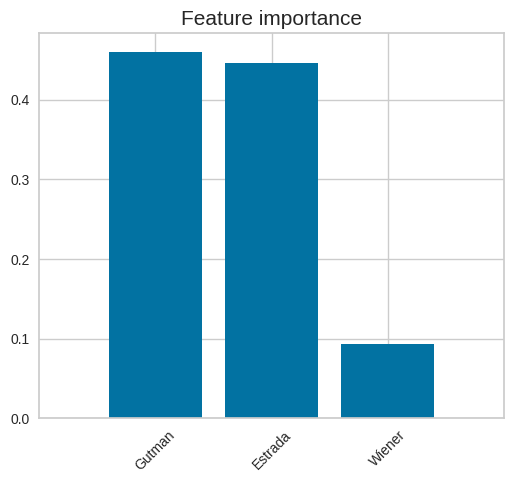

In [ ]:
importances=rf.feature_importances_
indices=np.argsort(importances)[::-1]
names=[data.columns[i] for i in indices]
plt.figure(figsize=(6,5))
plt.title("Feature importance",size=15)
plt.bar(range(data.shape[1]),importances[indices],align="center")
plt.xticks(range(data.shape[1]),names,rotation=45)
plt.xlim(-1,data.shape[1])

In [ ]:
reg.predict_model(rf)

feature_1  feature_2  feature_3      Enthalpy  prediction_label
2653   1.463873   0.625125   0.628058  12898.884766      11577.940696
1006   0.366753  -0.129653  -0.146686   7527.243164       7526.745113
1724  -0.669557  -0.344876  -0.335810   3145.508545       2966.772212
554    0.366667  -0.099593  -0.114409   7230.343750       7136.449626
85    -0.521518  -0.329428  -0.323201   3729.808350       3685.033155
...         ...        ...        ...           ...               ...
3236  -0.145195  -0.274318  -0.260907   6806.784668       6758.231050
2963  -0.817637  -0.355940  -0.344383   2266.634766       2238.257277
1049   0.218715  -0.172029  -0.184174   6914.451660       6910.802793
3429   0.061983  -0.201742  -0.208737   6079.299805       5759.961457
2867   0.070764  -0.231315  -0.240491   6302.780273       6299.134023

[1044 rows x 5 columns]

In [ ]:
tuned_rf_topological_index = tune_model(rf,
                                        n_iter=30,
                                        optimize = 'R2',
                                        fold=5,
                                        return_train_score=True,
                                        search_library="scikit-learn",
                                        search_algorithm="random",
                                        choose_better=True)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 30 candidates, totalling 150 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


2024/11/18 05:42:32 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [ ]:
evaluate_model(tuned_rf_topological_index)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
reg.predict_model(tuned_rf_topological_index)

feature_1  feature_2  feature_3      Enthalpy  prediction_label
2653   1.463873   0.625125   0.628058  12898.884766      11577.940696
1006   0.366753  -0.129653  -0.146686   7527.243164       7526.745113
1724  -0.669557  -0.344876  -0.335810   3145.508545       2966.772212
554    0.366667  -0.099593  -0.114409   7230.343750       7136.449626
85    -0.521518  -0.329428  -0.323201   3729.808350       3685.033155
...         ...        ...        ...           ...               ...
3236  -0.145195  -0.274318  -0.260907   6806.784668       6758.231050
2963  -0.817637  -0.355940  -0.344383   2266.634766       2238.257277
1049   0.218715  -0.172029  -0.184174   6914.451660       6910.802793
3429   0.061983  -0.201742  -0.208737   6079.299805       5759.961457
2867   0.070764  -0.231315  -0.240491   6302.780273       6299.134023

[1044 rows x 5 columns]

In [ ]:
y_predict_train=tuned_rf_topological_index.predict(reg.train.drop(["Enthalpy"],axis=1))
y_predict_test=tuned_rf_topological_index.predict(reg.test.drop(["Enthalpy"],axis=1))
y_train=reg.train.Enthalpy
y_test=reg.test.Enthalpy

In [ ]:
#R2 Train
r2_score(y_train,y_predict_train)

0.9962206915967574

In [ ]:
#R2 Test
r2_score(y_test,y_predict_test)

0.9810098100290914

In [ ]:
#RMSE Train
mean_squared_error(y_train,y_predict_train, squared=False)

261.15872897075155

In [ ]:
#RMSE Test
mean_squared_error(y_test,y_predict_test, squared=False)

551.9050106857236

In [ ]:
#MAE Train
mean_absolute_error(y_train,y_predict_train)

142.9970131119229

In [ ]:
#MAE Test
mean_absolute_error(y_test,y_predict_test)

287.5988036771947

In [ ]:
#MAPE Train
mean_absolute_percentage_error(y_train,y_predict_train)

0.06611400651563834

In [ ]:
#MAPE Test
mean_absolute_percentage_error(y_test,y_predict_test)

0.10486325417114686

In [ ]:
#RMSLE Train
root_mean_squared_log_error(y_train,y_predict_train)

0.14615504267282725

In [ ]:
#RMSLE Test
root_mean_squared_log_error(y_test,y_predict_test)

0.19335576653429504

<Figure size 600x500 with 0 Axes>

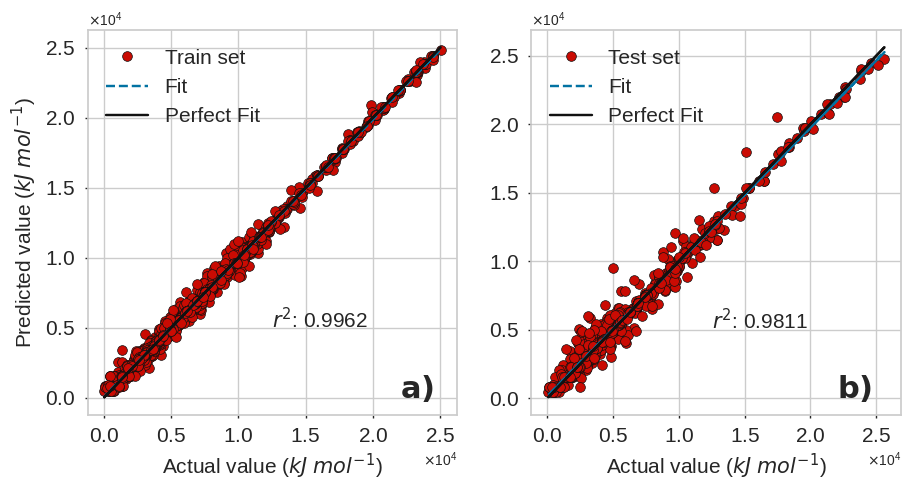

In [ ]:
"""
We make the parity graph for the training and test set
"""
reg_train=linregress(y_train,y_predict_train)
plt.figure(figsize=(6,5))
f, axes= plt.subplots(1,2, figsize=(10.5,5))
axes[0].text(22000,0, r"$\mathbf{a)}$",size=22)
axes[0].tick_params(labelsize=15, length=2)
axes[0].plot(y_train,y_predict_train,"ro", markeredgecolor="k", markeredgewidth=0.5,label="Train set")
axes[0].plot(y_train,reg_train.intercept+reg_train.slope*y_train, "b--", label="Fit")
axes[0].plot(y_train,y_train,"k-", label="Perfect Fit")
axes[0].set_xlabel(r"Actual value ($kJ$ $mol^{-1}$)", size=15)
axes[0].set_xticks(np.arange(0, 28000, 5000))
axes[0].set_ylabel("Predicted value ($kJ$ $mol^{-1}$)",size=15)
axes[0].legend(loc="best", prop={"size":15}, frameon=False)
axes[0].text(12500,5000,r"$r^2$: {}".format(round(reg_train.rvalue**2,4)), size=15)
axes[0].grid(visible=True)
axes[0].xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
axes[0].yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
axes[0].ticklabel_format(style='scientific', axis='both', scilimits=(0, 0))
#Realizamos el gráfico de paridad para el conjunto de prueba
reg_test=linregress(y_test,y_predict_test)
axes[1].text(22000,0, r"$\mathbf{b)}$",size=22)
axes[1].tick_params(labelsize=15, length=2)
axes[1].plot(y_test,y_predict_test,"ro",markeredgecolor="k", markeredgewidth=0.5,label="Test set")
axes[1].plot(y_test,reg_test.intercept+reg_test.slope*y_test, "b--", label="Fit")
axes[1].plot(y_test,y_test,"k-", label="Perfect Fit")
axes[1].set_xlabel(r"Actual value ($kJ$ $mol^{-1}$)", size=15)
#axes[1].set_ylabel("Predicted value ($kJ$ $mol^{-1}$)",size=15)
axes[1].set_xticks(np.arange(0, 28000, 5000))
axes[1].legend(loc="best", prop={"size":15}, frameon=False)
axes[1].text(12500,5000,r"$r^2$: {}".format(round(reg_test.rvalue**2,4)), size=15)
axes[1].grid(visible=True)
axes[1].xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
axes[1].yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
axes[1].ticklabel_format(style='scientific', axis='both', scilimits=(0, 0))
#plt.savefig("KNNTopologicalPredictors.png", dpi=500, bbox_inches='tight', pad_inches=0.1)
plt.show()

# **Unsupervised Learning**

In [ ]:
data_graphs=pd.read_csv("/content/drive/MyDrive/Artículo Índices Topológicos JCIM 2025/Archivos csv/All.csv")
data_graphs.head()

Name                                             SMILES  Estado  \
0  abietic acid  CC(C)C1=CC2=CC[C@@H]3[C@@]([C@H]2CC1)(CCC[C@@]...       1   
1  acenaphthene                            C1CC2=CC=CC3=C2C1=CC=C3       2   
2        acetal                                         CCOC(C)OCC       3   
3  acetaldehyde                                               CC=O       1   
4     acetamide                                            CC(=O)N       2   

     Degree       Bet     Eigen     Closs     Estrada  Wiener  Gutman  \
0  2.076923  0.087089  0.106051  0.193297  133.219993    7100   26048   
1  2.181818  0.123160  0.187248  0.297329   56.953140     800    3203   
2  1.909091  0.154329  0.187516  0.253346   52.650084     944    2873   
3  1.714286  0.200000  0.350527  0.522632   15.326358      42      90   
4  1.777778  0.198413  0.304505  0.436147   20.109140      86     208   

       Enthalpy  
0  10960.527550  
1   6013.523824  
2   3566.534587  
3   1100.636618  
4    999.599324

In [ ]:
#Data scaling
graph_predictors=data_graphs.drop(["Name","SMILES","Estado","Degree","Bet","Eigen","Closs"], axis=1)
scaler=StandardScaler()
scaler.fit(graph_predictors)
graph_predictors_scaled=scaler.transform(graph_predictors)
#graph_predictors_scaled=pd.DataFrame(data=graph_predictors_scaled)
#graph_predictors_scaled=pd.concat([graph_predictors_scaled,data_graphs.Estado],axis=1)
#graph_predictors_scaled.rename(columns={"Estado":4},inplace=True)
graph_predictors_scaled

array([[ 1.15015053,  0.1200841 ,  0.12936933,  1.20955785],
       [-0.34904586, -0.31829497, -0.29734971,  0.02604331],
       [-0.43363209, -0.30827488, -0.30351375, -0.55937112],
       ...,
       [-0.44845647, -0.32024332, -0.30368186, -0.18994706],
       [-0.44845673, -0.31899081, -0.30211283, -0.18341584],
       [-0.32977923, -0.29672394, -0.28743123, -0.33047585]])

In [ ]:
from pycaret.clustering import *
clu1 = setup(graph_predictors, session_id=123, log_experiment=True, log_plots = True,
             experiment_name='Clustering1')

2024/11/15 05:12:24 INFO mlflow.tracking.fluent: Experiment with name 'Clustering1' does not exist. Creating a new experiment.


In [ ]:
models()

Name  \
ID                                            
kmeans                   K-Means Clustering   
ap                     Affinity Propagation   
meanshift             Mean Shift Clustering   
sc                      Spectral Clustering   
hclust             Agglomerative Clustering   
dbscan     Density-Based Spatial Clustering   
optics                    OPTICS Clustering   
birch                      Birch Clustering   

                                                   Reference  
ID                                                            
kmeans                        sklearn.cluster._kmeans.KMeans  
ap         sklearn.cluster._affinity_propagation.Affinity...  
meanshift              sklearn.cluster._mean_shift.MeanShift  
sc              sklearn.cluster._spectral.SpectralClustering  
hclust     sklearn.cluster._agglomerative.AgglomerativeCl...  
dbscan                        sklearn.cluster._dbscan.DBSCAN  
optics                        sklearn.cluster._optics.OPTICS  
birch                           sklearn.cluster._birch.Birch

In [ ]:
kmeans = create_model('kmeans', num_clusters = 7)

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

2024/11/13 18:18:54 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [ ]:
tuned_kmeans = kmeans.get_params()
tuned_kmeans

{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 7,
 'n_init': 'auto',
 'random_state': 123,
 'tol': 0.0001,
 'verbose': 0}

In [ ]:
kmeans_results = assign_model(kmeans)
kmeans_results.head()

Estrada  Wiener  Gutman      Enthalpy    Cluster
0  133.219986    7100   26048  10960.527344  Cluster 5
1   56.953140     800    3203   6013.523926  Cluster 0
2   52.650085     944    2873   3566.534668  Cluster 0
3   15.326358      42      90   1100.636597  Cluster 0
4   20.109140      86     208    999.599304  Cluster 0

In [ ]:
plot_model(kmeans, feature = 'Enthalpy', label=True)

In [ ]:
plot_model(kmeans, plot = 'tsne')

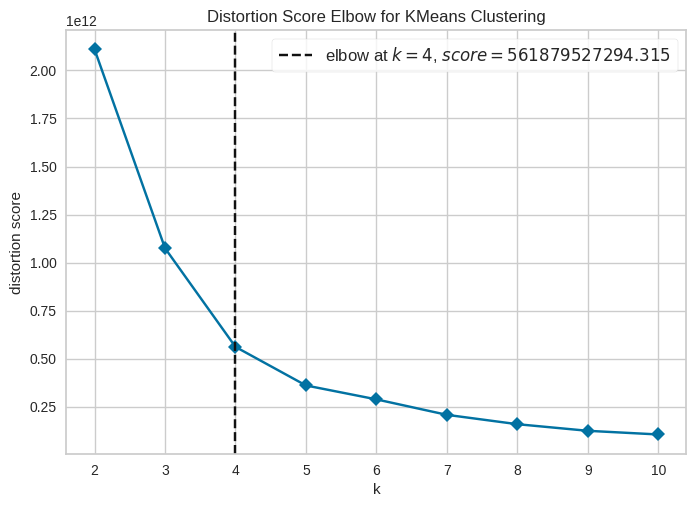

In [ ]:
plot_model(kmeans, plot = 'elbow')

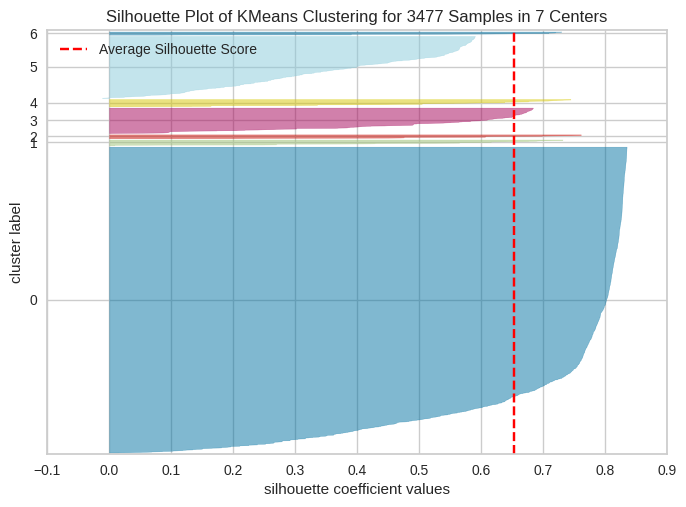

In [ ]:
plot_model(kmeans, plot = 'silhouette')

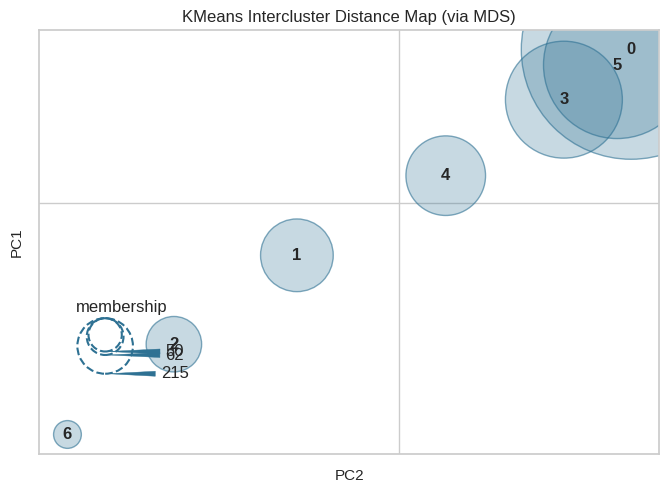

In [ ]:
plot_model(kmeans, plot = 'distance')

In [ ]:
plot_model(kmeans, plot = 'distribution')

## **KMeans**

In [ ]:
data_graphs.head()

Name                                             SMILES  Estado  \
0  abietic acid  CC(C)C1=CC2=CC[C@@H]3[C@@]([C@H]2CC1)(CCC[C@@]...       1   
1  acenaphthene                            C1CC2=CC=CC3=C2C1=CC=C3       2   
2        acetal                                         CCOC(C)OCC       3   
3  acetaldehyde                                               CC=O       1   
4     acetamide                                            CC(=O)N       2   

     Degree       Bet     Eigen     Closs     Estrada  Wiener  Gutman  \
0  2.076923  0.087089  0.106051  0.193297  133.219993    7100   26048   
1  2.181818  0.123160  0.187248  0.297329   56.953140     800    3203   
2  1.909091  0.154329  0.187516  0.253346   52.650084     944    2873   
3  1.714286  0.200000  0.350527  0.522632   15.326358      42      90   
4  1.777778  0.198413  0.304505  0.436147   20.109140      86     208   

       Enthalpy  
0  10960.527550  
1   6013.523824  
2   3566.534587  
3   1100.636618  
4    999.599324

In [ ]:
#Escalamiento
graph_predictors=data_graphs.drop(["Name","SMILES","Estado","Degree","Bet","Eigen","Closs"], axis=1)
scaler=StandardScaler()
scaler.fit(graph_predictors)
graph_predictors_scaled=scaler.transform(graph_predictors)
#graph_predictors_scaled=pd.DataFrame(data=graph_predictors_scaled)
#graph_predictors_scaled=pd.concat([graph_predictors_scaled,data_graphs.Estado],axis=1)
#graph_predictors_scaled.rename(columns={"Estado":4},inplace=True)
graph_predictors_scaled

array([[ 1.15015053,  0.1200841 ,  0.12936933,  1.20955785],
       [-0.34904586, -0.31829497, -0.29734971,  0.02604331],
       [-0.43363209, -0.30827488, -0.30351375, -0.55937112],
       ...,
       [-0.44845647, -0.32024332, -0.30368186, -0.18994706],
       [-0.44845673, -0.31899081, -0.30211283, -0.18341584],
       [-0.32977923, -0.29672394, -0.28743123, -0.33047585]])

#### **Elbow method to find optimal number of groups**

In [ ]:
distortion = []
for i in range(1,15):
  km=KMeans(algorithm="lloyd",
            copy_x=True,
            n_clusters=i,
            init="k-means++",
            n_init="auto",
            max_iter=300,
            random_state=0,
            verbose=0)
  km.fit(graph_predictors_scaled)
  distortion.append(km.inertia_)


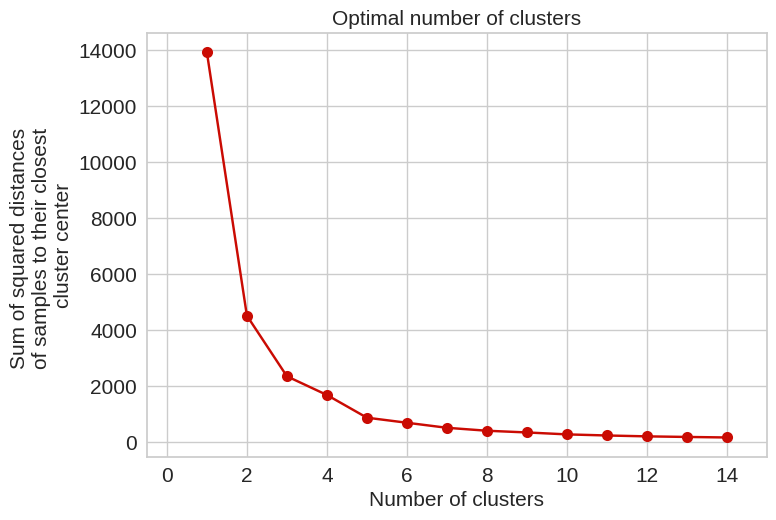

In [ ]:
plt.title("Optimal number of clusters", size=15)
plt.plot(range(1,15),distortion, "ro-", markeredgecolor="black", markersize=8)
plt.xlabel("Number of clusters",size=15)
#plt.ylim(0,20000)
plt.ylabel("Sum of squared distances \nof samples to their closest \ncluster center",size=15)
plt.grid(visible=True)
plt.tick_params(labelsize=15)
plt.xlim(-0.5,15)
#plt.savefig("ElbowMethod.png", dpi=500, bbox_inches='tight', pad_inches=0.1)
plt.show()

#### **Clustering quality using silhouette graphics**

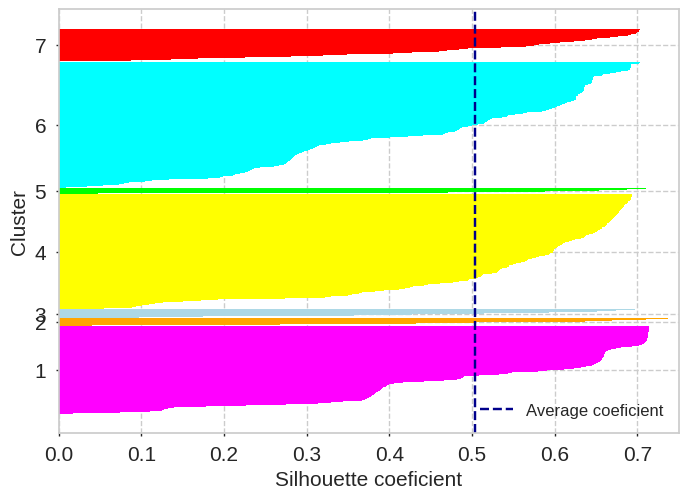

In [ ]:
from matplotlib import cm
km=KMeans(n_clusters=7,
          copy_x= True,
          algorithm="lloyd",
          init="k-means++",
          n_init=10,
          max_iter=300,
          tol=1e-04,
          random_state=0,
          verbose=0)

y_km=km.fit_predict(graph_predictors_scaled)
cluster_labels=np.unique(y_km)
n_clusters=cluster_labels.shape[0]
silhouette_vals=silhouette_samples(graph_predictors_scaled, y_km, metric="euclidean")
colors=["magenta","orange","lightblue","yellow","lime","cyan","red"]
y_ax_lower,y_ax_upper=0,0
y_ticks=[]
for i, c in zip(colors,cluster_labels):
  c_silhouette_vals=silhouette_vals[y_km==c]
  c_silhouette_vals.sort()
  y_ax_upper+=len(c_silhouette_vals)
  color=i#
  plt.barh(range(y_ax_lower,y_ax_upper),
           c_silhouette_vals,
           height=1.0,
           edgecolor="none",
           color=color)
  y_ticks.append((y_ax_lower + y_ax_upper)/2)
  y_ax_lower+=len(c_silhouette_vals)
silhouette_avg=np.mean(silhouette_vals)
plt.axvline(silhouette_avg,
            color="darkblue",
            linestyle="--",label="Average coeficient")
plt.yticks(y_ticks,cluster_labels+1)
plt.tick_params(labelsize=15, length=2 )
plt.xticks(np.arange(0,0.8,0.1))
plt.ylabel("Cluster",size=15)
plt.xlabel("Silhouette coeficient", size=15)
plt.xlim(0,0.75)
plt.legend(loc="best", prop={"size":12})
plt.grid(linestyle="--")
#plt.savefig("SilCoef.png", dpi=500, bbox_inches='tight', pad_inches=0.1)
plt.show()



In [ ]:
#Silhouette coefficient
silhouette_avg

0.5033136104371612

In [ ]:
#Calinski Harabasz score
calinski_harabasz_score(graph_predictors_scaled, y_km,)

15016.369438295382

In [ ]:
#Davies Bouldin score
davies_bouldin_score(graph_predictors_scaled, y_km,)

0.5606524440994773

'\naxes[0].scatter(km.cluster_centers_[:,1],\n            km.cluster_centers_[:,2],\n            s=250, marker="*",\n            c="red",edgecolor="black",\n            label="Centroides")\n'

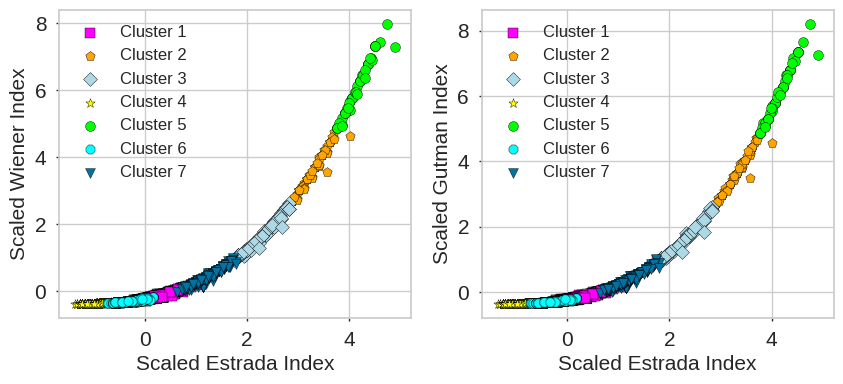

In [ ]:
f,axes=plt.subplots(1,2, figsize=(10,4))
##Estrada vs Wiener
axes[0].scatter(graph_predictors_scaled[y_km==0,0],
            graph_predictors_scaled[y_km==0,1],
            s=50, c="magenta",
            marker="s",edgecolor="black",
            label="Cluster 1")

axes[0].scatter(graph_predictors_scaled[y_km==1,0],
            graph_predictors_scaled[y_km==1,1],
            s=50, c="orange",
            marker="p",edgecolor="black",
            label="Cluster 2")


axes[0].scatter(graph_predictors_scaled[y_km==2,0],
            graph_predictors_scaled[y_km==2,1],
            s=50, c="lightblue",
            marker="D",edgecolor="black",
            label="Cluster 3")


axes[0].scatter(graph_predictors_scaled[y_km==3,0],
            graph_predictors_scaled[y_km==3,1],
            s=50, c="yellow",
            marker="*",edgecolor="black",
            label="Cluster 4")

axes[0].scatter(graph_predictors_scaled[y_km==4,0],
            graph_predictors_scaled[y_km==4,1],
            s=50, c="lime",
            marker="o",edgecolor="black",
            label="Cluster 5")

axes[0].scatter(graph_predictors_scaled[y_km==5,0],
            graph_predictors_scaled[y_km==5,1],
            s=50, c="cyan",
            marker="8",edgecolor="black",
            label="Cluster 6")

axes[0].scatter(graph_predictors_scaled[y_km==6,0],
            graph_predictors_scaled[y_km==6,1],
            s=50,
            marker="v",edgecolor="black",
            label="Cluster 7")

axes[0].tick_params(labelsize=15, length=2)
axes[0].legend(scatterpoints=1,prop={"size":12})
axes[0].grid(visible=True)
axes[0].set_xlabel("Scaled Estrada Index",size=15)
axes[0].set_ylabel("Scaled Wiener Index",size=15)

#Estrada vs Gutman
axes[1].scatter(graph_predictors_scaled[y_km==0,0],
            graph_predictors_scaled[y_km==0,2],
            s=50, c="magenta",
            marker="s",edgecolor="black",
            label="Cluster 1")

axes[1].scatter(graph_predictors_scaled[y_km==1,0],
            graph_predictors_scaled[y_km==1,2],
            s=50, c="orange",
            marker="p",edgecolor="black",
            label="Cluster 2")


axes[1].scatter(graph_predictors_scaled[y_km==2,0],
            graph_predictors_scaled[y_km==2,2],
            s=50, c="lightblue",
            marker="D",edgecolor="black",
            label="Cluster 3")


axes[1].scatter(graph_predictors_scaled[y_km==3,0],
            graph_predictors_scaled[y_km==3,2],
            s=50, c="yellow",
            marker="*",edgecolor="black",
            label="Cluster 4")

axes[1].scatter(graph_predictors_scaled[y_km==4,0],
            graph_predictors_scaled[y_km==4,2],
            s=50, c="lime",
            marker="o",edgecolor="black",
            label="Cluster 5")

axes[1].scatter(graph_predictors_scaled[y_km==5,0],
            graph_predictors_scaled[y_km==5,2],
            s=50, c="cyan",
            marker="8",edgecolor="black",
            label="Cluster 6")

axes[1].scatter(graph_predictors_scaled[y_km==6,0],
            graph_predictors_scaled[y_km==6,2],
            s=50,
            marker="v",edgecolor="black",
            label="Cluster 7")

axes[1].tick_params(labelsize=15, length=2)
axes[1].legend(scatterpoints=1,prop={"size":12})
axes[1].grid(visible=True)
axes[1].set_xlabel("Scaled Estrada Index",size=15)
axes[1].set_ylabel("Scaled Gutman Index",size=15)

"""
axes[0].scatter(km.cluster_centers_[:,1],
            km.cluster_centers_[:,2],
            s=250, marker="*",
            c="red",edgecolor="black",
            label="Centroides")
"""

In [ ]:
todos=pd.concat([pd.DataFrame(graph_predictors),pd.Series(y_km,name="Grupo"),data_graphs.Estado],axis=1).rename(columns={0:"Estrada",1:"Wiener",2:"Gutman",3:"Entalpia"})
pd.set_option("display.max_rows",None)
#todos.to_csv("todosclusters.csv")
todos.Grupo.replace({0:1,1:2,2:3,3:4,4:5,5:6,6:7},inplace=True)
todos.rename(columns={"Grupo":"Cluster", "Estado":"State"},inplace=True)
todos=pd.concat([todos,data_graphs.Name],axis=1)
todos.to_csv("todos_cluster.csv")
todos.head()

Estrada  Wiener  Gutman      Enthalpy  Cluster  State          Name
0  133.219993    7100   26048  10960.527550        7      1  abietic acid
1   56.953140     800    3203   6013.523824        6      2  acenaphthene
2   52.650084     944    2873   3566.534587        6      3        acetal
3   15.326358      42      90   1100.636618        4      1  acetaldehyde
4   20.109140      86     208    999.599324        4      2     acetamide

(0.0, 30000.0)

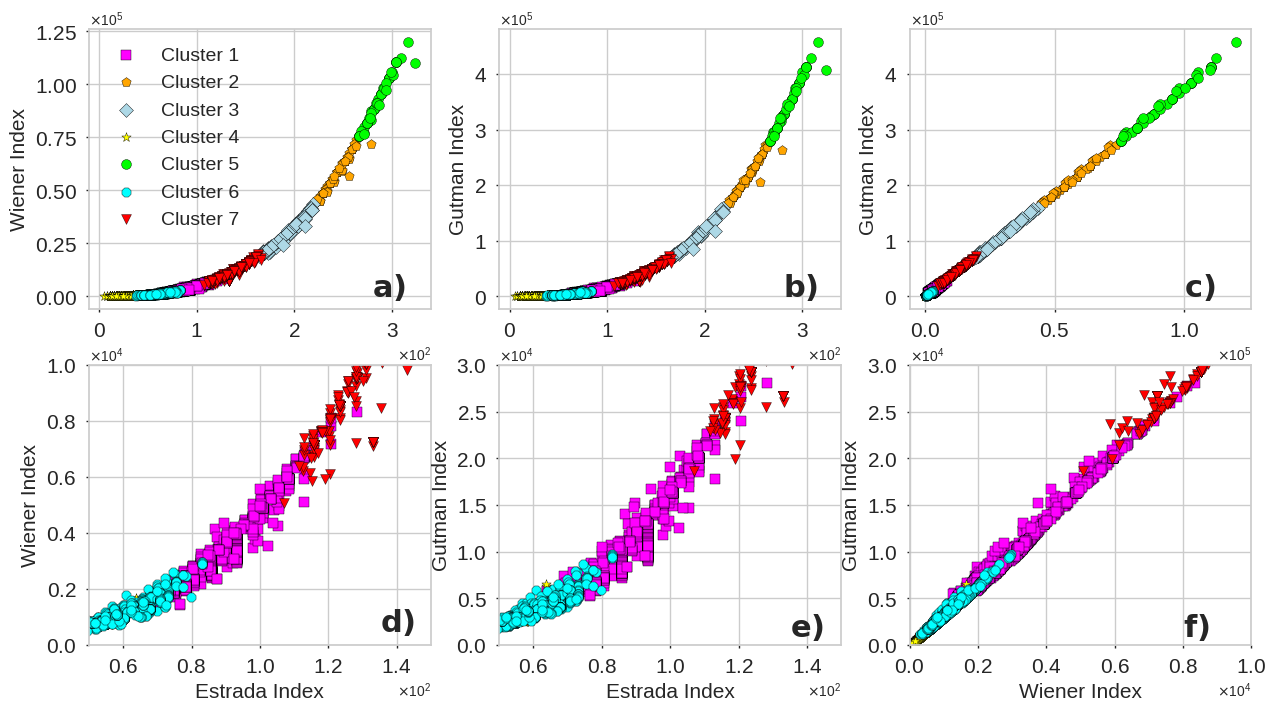

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
f,axes=plt.subplots(2,3, figsize=(15,8))
##Estrada vs Wiener


axes[0,0].scatter(todos.Estrada[todos["Cluster"]==1],
            todos.Wiener[todos["Cluster"]==1],
            s=50, c="magenta",
            marker="s",edgecolor="black",
            label="Cluster 1")


axes[0,0].scatter(todos.Estrada[todos["Cluster"]==2],
            todos.Wiener[todos["Cluster"]==2],
            s=50, c="orange",
            marker="p",edgecolor="black",
            label="Cluster 2")


axes[0,0].scatter(todos.Estrada[todos["Cluster"]==3],
            todos.Wiener[todos["Cluster"]==3],
            s=50, c="lightblue",
            marker="D",edgecolor="black",
            label="Cluster 3")


axes[0,0].scatter(todos.Estrada[todos["Cluster"]==4],
            todos.Wiener[todos["Cluster"]==4],
            s=50, c="yellow",
            marker="*",edgecolor="black",
            label="Cluster 4")

axes[0,0].scatter(todos.Estrada[todos["Cluster"]==5],
            todos.Wiener[todos["Cluster"]==5],
            s=50, c="lime",
            marker="o",edgecolor="black",
            label="Cluster 5")

axes[0,0].scatter(todos.Estrada[todos["Cluster"]==6],
            todos.Wiener[todos["Cluster"]==6],
            s=50, c="cyan",
            marker="8",edgecolor="black",
            label="Cluster 6")

axes[0,0].scatter(todos.Estrada[todos["Cluster"]==7],
            todos.Wiener[todos["Cluster"]==7],
            s=50,c="red",
            marker="v",edgecolor="black",
            label="Cluster 7")

axes[0,0].tick_params(labelsize=15, length=2)
axes[0,0].legend(scatterpoints=1,prop={"size":14})
axes[0,0].grid(visible=True)
#axes[0,0].set_xlabel("Estrada Index",size=15)
axes[0,0].set_ylabel("Wiener Index",size=15)
axes[0,0].xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
axes[0,0].yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
axes[0,0].ticklabel_format(style='scientific', axis='both', scilimits=(0, 0))
axes[0,0].text(280,0, r"$\mathbf{a)}$",size=22)


#Estrada vs Gutman
axes[0,1].scatter(todos.Estrada[todos["Cluster"]==1],
            todos.Gutman[todos["Cluster"]==1],
            s=50, c="magenta",
            marker="s",edgecolor="black",
            label="Cluster 1")

axes[0,1].scatter(todos.Estrada[todos["Cluster"]==2],
            todos.Gutman[todos["Cluster"]==2],
            s=50, c="orange",
            marker="p",edgecolor="black",
            label="Cluster 2")


axes[0,1].scatter(todos.Estrada[todos["Cluster"]==3],
            todos.Gutman[todos["Cluster"]==3],
            s=50, c="lightblue",
            marker="D",edgecolor="black",
            label="Cluster 3")


axes[0,1].scatter(todos.Estrada[todos["Cluster"]==4],
            todos.Gutman[todos["Cluster"]==4],
            s=50, c="yellow",
            marker="*",edgecolor="black",
            label="Cluster 4")

axes[0,1].scatter(todos.Estrada[todos["Cluster"]==5],
            todos.Gutman[todos["Cluster"]==5],
            s=50, c="lime",
            marker="o",edgecolor="black",
            label="Cluster 5")

axes[0,1].scatter(todos.Estrada[todos["Cluster"]==6],
            todos.Gutman[todos["Cluster"]==6],
            s=50, c="cyan",
            marker="8",edgecolor="black",
            label="Cluster 6")

axes[0,1].scatter(todos.Estrada[todos["Cluster"]==7],
            todos.Gutman[todos["Cluster"]==7],
            s=50,c="red",
            marker="v",edgecolor="black",
            label="Cluster 7")
from matplotlib.ticker import ScalarFormatter
axes[0,1].tick_params(labelsize=15, length=2)
#axes[0,1].legend(scatterpoints=1,prop={"size":10})
axes[0,1].grid(visible=True)
#axes[0,1].set_xlabel("Estrada Index",size=15)
axes[0,1].set_ylabel("Gutman Index",size=15)
axes[0,1].xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
axes[0,1].yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
axes[0,1].ticklabel_format(style='scientific', axis='both', scilimits=(0, 0))
axes[0,1].text(280,0, r"$\mathbf{b)}$",size=22)

#Wiener vs Gutman
axes[0,2].scatter(todos.Wiener[todos["Cluster"]==1],
            todos.Gutman[todos["Cluster"]==1],
            s=50, c="magenta",
            marker="s",edgecolor="black",
            label="Cluster 1")

axes[0,2].scatter(todos.Wiener[todos["Cluster"]==2],
            todos.Gutman[todos["Cluster"]==2],
            s=50, c="orange",
            marker="p",edgecolor="black",
            label="Cluster 2")


axes[0,2].scatter(todos.Wiener[todos["Cluster"]==3],
            todos.Gutman[todos["Cluster"]==3],
            s=50, c="lightblue",
            marker="D",edgecolor="black",
            label="Cluster 3")


axes[0,2].scatter(todos.Wiener[todos["Cluster"]==4],
            todos.Gutman[todos["Cluster"]==4],
            s=50, c="yellow",
            marker="*",edgecolor="black",
            label="Cluster 4")

axes[0,2].scatter(todos.Wiener[todos["Cluster"]==5],
            todos.Gutman[todos["Cluster"]==5],
            s=50, c="lime",
            marker="o",edgecolor="black",
            label="Cluster 5")

axes[0,2].scatter(todos.Wiener[todos["Cluster"]==6],
            todos.Gutman[todos["Cluster"]==6],
            s=50, c="cyan",
            marker="8",edgecolor="black",
            label="Cluster 6")

axes[0,2].scatter(todos.Wiener[todos["Cluster"]==7],
            todos.Gutman[todos["Cluster"]==7],
            s=50,c="red",
            marker="v",edgecolor="black",
            label="Cluster 7")

axes[0,2].tick_params(labelsize=15, length=2)
#axes[0,2].legend(scatterpoints=1,prop={"size":10})
axes[0,2].grid(visible=True)
#axes[0,2].set_xlabel("Wiener Index",size=15)
axes[0,2].set_ylabel("Gutman Index",size=15)
axes[0,2].xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
axes[0,2].yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
axes[0,2].ticklabel_format(style='scientific', axis='both', scilimits=(0, 0))
axes[0,2].text(100000,0, r"$\mathbf{c)}$",size=22)

##Estrada vs Wiener zoom in
axes[1,0].scatter(todos.Estrada[todos["Cluster"]==1],
            todos.Wiener[todos["Cluster"]==1],
            s=50, c="magenta",
            marker="s",edgecolor="black",
            label="Cluster 1")

axes[1,0].scatter(todos.Estrada[todos["Cluster"]==2],
            todos.Wiener[todos["Cluster"]==2],
            s=50, c="orange",
            marker="p",edgecolor="black",
            label="Cluster 2")


axes[1,0].scatter(todos.Estrada[todos["Cluster"]==3],
            todos.Wiener[todos["Cluster"]==3],
            s=50, c="lightblue",
            marker="D",edgecolor="black",
            label="Cluster 3")


axes[1,0].scatter(todos.Estrada[todos["Cluster"]==4],
            todos.Wiener[todos["Cluster"]==4],
            s=50, c="yellow",
            marker="*",edgecolor="black",
            label="Cluster 4")

axes[1,0].scatter(todos.Estrada[todos["Cluster"]==5],
            todos.Wiener[todos["Cluster"]==5],
            s=50, c="lime",
            marker="o",edgecolor="black",
            label="Cluster 5")

axes[1,0].scatter(todos.Estrada[todos["Cluster"]==6],
            todos.Wiener[todos["Cluster"]==6],
            s=50, c="cyan",
            marker="8",edgecolor="black",
            label="Cluster 6")

axes[1,0].scatter(todos.Estrada[todos["Cluster"]==7],
            todos.Wiener[todos["Cluster"]==7],
            s=50,c="red",
            marker="v",edgecolor="black",
            label="Cluster 7")

axes[1,0].tick_params(labelsize=15, length=2)
#axes[1,0].legend(scatterpoints=1,prop={"size":10})
axes[1,0].grid(visible=True)
axes[1,0].set_xlabel("Estrada Index",size=15)
axes[1,0].set_ylabel("Wiener Index",size=15)
axes[1,0].xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
axes[1,0].yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
axes[1,0].ticklabel_format(style='scientific', axis='both', scilimits=(0, 0))
axes[1,0].text(135,0.05e4, r"$\mathbf{d)}$",size=22)
axes[1,0].set_xlim(50,150)
axes[1,0].set_ylim(0,10000)

#Estrada vs Gutman
axes[1,1].scatter(todos.Estrada[todos["Cluster"]==1],
            todos.Gutman[todos["Cluster"]==1],
            s=50, c="magenta",
            marker="s",edgecolor="black",
            label="Cluster 1")

axes[1,1].scatter(todos.Estrada[todos["Cluster"]==2],
            todos.Gutman[todos["Cluster"]==2],
            s=50, c="orange",
            marker="p",edgecolor="black",
            label="Cluster 2")


axes[1,1].scatter(todos.Estrada[todos["Cluster"]==3],
            todos.Gutman[todos["Cluster"]==3],
            s=50, c="lightblue",
            marker="D",edgecolor="black",
            label="Cluster 3")


axes[1,1].scatter(todos.Estrada[todos["Cluster"]==4],
            todos.Gutman[todos["Cluster"]==4],
            s=50, c="yellow",
            marker="*",edgecolor="black",
            label="Cluster 4")

axes[1,1].scatter(todos.Estrada[todos["Cluster"]==5],
            todos.Gutman[todos["Cluster"]==5],
            s=50, c="lime",
            marker="o",edgecolor="black",
            label="Cluster 5")

axes[1,1].scatter(todos.Estrada[todos["Cluster"]==6],
            todos.Gutman[todos["Cluster"]==6],
            s=50, c="cyan",
            marker="8",edgecolor="black",
            label="Cluster 6")

axes[1,1].scatter(todos.Estrada[todos["Cluster"]==7],
            todos.Gutman[todos["Cluster"]==7],
            s=50,c="red",
            marker="v",edgecolor="black",
            label="Cluster 7")
from matplotlib.ticker import ScalarFormatter
axes[1,1].tick_params(labelsize=15, length=2)
#axes[1,1].legend(loc="upper left",scatterpoints=1,prop={"size":10})
axes[1,1].grid(visible=True)
axes[1,1].set_xlabel("Estrada Index",size=15)
axes[1,1].set_ylabel("Gutman Index",size=15)
axes[1,1].xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
axes[1,1].yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
axes[1,1].ticklabel_format(style='scientific', axis='both', scilimits=(0, 0))
axes[1,1].text(135,0.09e4, r"$\mathbf{e)}$",size=22)
axes[1,1].set_xlim(50,150)
axes[1,1].set_ylim(0,30000)

#Wiener vs Gutman
axes[1,2].scatter(todos.Wiener[todos["Cluster"]==1],
            todos.Gutman[todos["Cluster"]==1],
            s=50, c="magenta",
            marker="s",edgecolor="black",
            label="Cluster 1")

axes[1,2].scatter(todos.Wiener[todos["Cluster"]==2],
            todos.Gutman[todos["Cluster"]==2],
            s=50, c="orange",
            marker="p",edgecolor="black",
            label="Cluster 2")


axes[1,2].scatter(todos.Wiener[todos["Cluster"]==3],
            todos.Gutman[todos["Cluster"]==3],
            s=50, c="lightblue",
            marker="D",edgecolor="black",
            label="Cluster 3")


axes[1,2].scatter(todos.Wiener[todos["Cluster"]==4],
            todos.Gutman[todos["Cluster"]==4],
            s=50, c="yellow",
            marker="*",edgecolor="black",
            label="Cluster 4")

axes[1,2].scatter(todos.Wiener[todos["Cluster"]==5],
            todos.Gutman[todos["Cluster"]==5],
            s=50, c="lime",
            marker="o",edgecolor="black",
            label="Cluster 5")

axes[1,2].scatter(todos.Wiener[todos["Cluster"]==6],
            todos.Gutman[todos["Cluster"]==6],
            s=50, c="cyan",
            marker="8",edgecolor="black",
            label="Cluster 6")

axes[1,2].scatter(todos.Wiener[todos["Cluster"]==7],
            todos.Gutman[todos["Cluster"]==7],
            s=50, c="red",
            marker="v",edgecolor="black",
            label="Cluster 7")

axes[1,2].tick_params(labelsize=15, length=2)
#axes[1,2].legend(scatterpoints=1,prop={"size":10})
axes[1,2].grid(visible=True)
axes[1,2].set_xlabel("Wiener Index",size=15)
axes[1,2].set_ylabel("Gutman Index",size=15)
axes[1,2].xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
axes[1,2].yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
axes[1,2].ticklabel_format(style='scientific', axis='both', scilimits=(0, 0))
axes[1,2].text(0.8e4,0.09e4, r"$\mathbf{f)}$",size=22)
axes[1,2].set_xlim(0,0.1e5)
axes[1,2].set_ylim(0,30000)
#plt.savefig("TopologicalSpace.png", dpi=500, bbox_inches='tight', pad_inches=0.1)



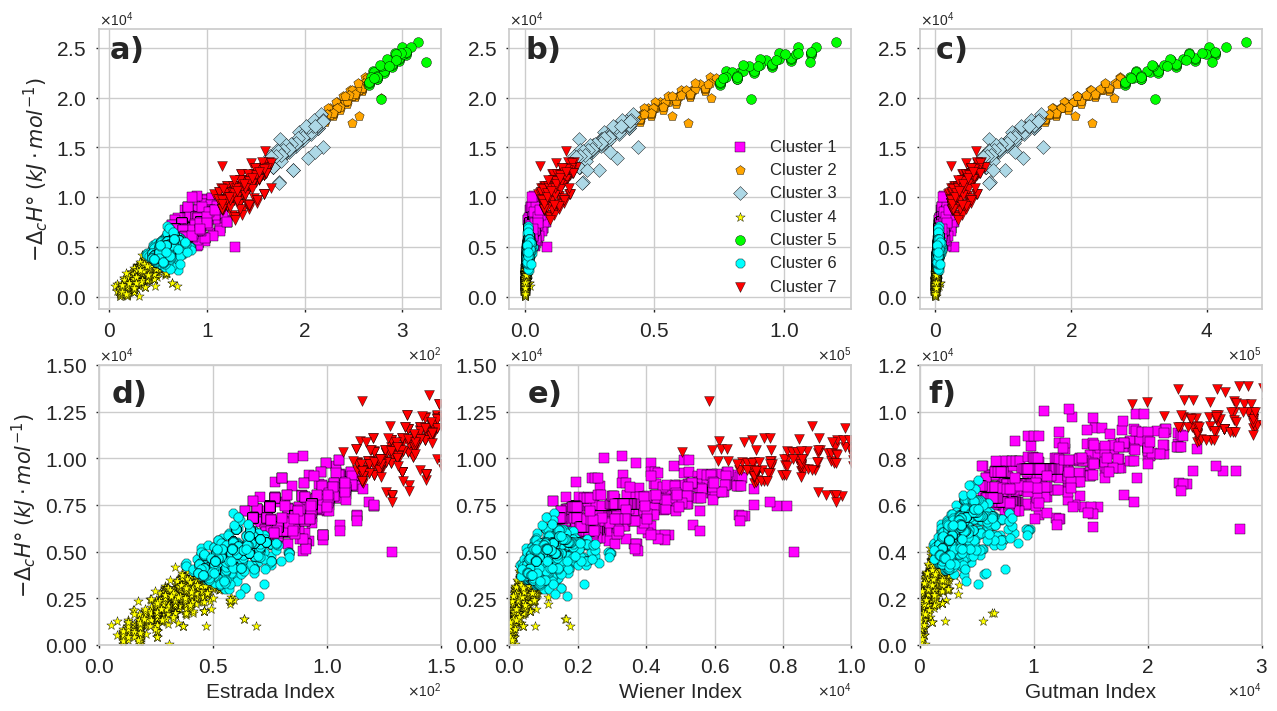

In [ ]:
f,axes=plt.subplots(2,3, figsize=(15,8))
##Estrada vs Enthalpy


axes[0,0].scatter(todos.Estrada[todos["Cluster"]==1],
            todos.Enthalpy[todos["Cluster"]==1],
            s=50, c="magenta",
            marker="s",edgecolor="black",
            label="Cluster 1")


axes[0,0].scatter(todos.Estrada[todos["Cluster"]==2],
            todos.Enthalpy[todos["Cluster"]==2],
            s=50, c="orange",
            marker="p",edgecolor="black",
            label="Cluster 2")


axes[0,0].scatter(todos.Estrada[todos["Cluster"]==3],
            todos.Enthalpy[todos["Cluster"]==3],
            s=50, c="lightblue",
            marker="D",edgecolor="black",
            label="Cluster 3")


axes[0,0].scatter(todos.Estrada[todos["Cluster"]==4],
            todos.Enthalpy[todos["Cluster"]==4],
            s=50, c="yellow",
            marker="*",edgecolor="black",
            label="Cluster 4")

axes[0,0].scatter(todos.Estrada[todos["Cluster"]==5],
            todos.Enthalpy[todos["Cluster"]==5],
            s=50, c="lime",
            marker="o",edgecolor="black",
            label="Cluster 5")

axes[0,0].scatter(todos.Estrada[todos["Cluster"]==6],
            todos.Enthalpy[todos["Cluster"]==6],
            s=50, c="cyan",
            marker="8",edgecolor="black",
            label="Cluster 6")

axes[0,0].scatter(todos.Estrada[todos["Cluster"]==7],
            todos.Enthalpy[todos["Cluster"]==7],
            s=50,c="red",
            marker="v",edgecolor="black",
            label="Cluster 7")

axes[0,0].tick_params(labelsize=15, length=2)
#axes[0,0].legend(scatterpoints=1,prop={"size":12})
axes[0,0].grid(visible=True)
#axes[0,0].set_xlabel("Estrada Index",size=15)
axes[0,0].set_ylabel(r"$-\Delta_cH°$ $(kJ \cdot mol^{-1})$",size=15)
axes[0,0].xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
axes[0,0].yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
axes[0,0].ticklabel_format(style='scientific', axis='both', scilimits=(0, 0))
axes[0,0].text(0,2.4e4, r"$\mathbf{a)}$",size=22)


#Estrada vs Gutman
axes[0,1].scatter(todos.Wiener[todos["Cluster"]==1],
            todos.Enthalpy[todos["Cluster"]==1],
            s=50, c="magenta",
            marker="s",edgecolor="black",
            label="Cluster 1")

axes[0,1].scatter(todos.Wiener[todos["Cluster"]==2],
            todos.Enthalpy[todos["Cluster"]==2],
            s=50, c="orange",
            marker="p",edgecolor="black",
            label="Cluster 2")


axes[0,1].scatter(todos.Wiener[todos["Cluster"]==3],
            todos.Enthalpy[todos["Cluster"]==3],
            s=50, c="lightblue",
            marker="D",edgecolor="black",
            label="Cluster 3")


axes[0,1].scatter(todos.Wiener[todos["Cluster"]==4],
            todos.Enthalpy[todos["Cluster"]==4],
            s=50, c="yellow",
            marker="*",edgecolor="black",
            label="Cluster 4")

axes[0,1].scatter(todos.Wiener[todos["Cluster"]==5],
            todos.Enthalpy[todos["Cluster"]==5],
            s=50, c="lime",
            marker="o",edgecolor="black",
            label="Cluster 5")

axes[0,1].scatter(todos.Wiener[todos["Cluster"]==6],
            todos.Enthalpy[todos["Cluster"]==6],
            s=50, c="cyan",
            marker="8",edgecolor="black",
            label="Cluster 6")

axes[0,1].scatter(todos.Wiener[todos["Cluster"]==7],
            todos.Enthalpy[todos["Cluster"]==7],
            s=50,c="red",
            marker="v",edgecolor="black",
            label="Cluster 7")
from matplotlib.ticker import ScalarFormatter
axes[0,1].tick_params(labelsize=15, length=2)
axes[0,1].legend(scatterpoints=1,prop={"size":12})
axes[0,1].grid(visible=True)
#axes[0,1].set_xlabel("Estrada Index",size=15)
#axes[0,1].set_ylabel("Gutman Index",size=15)
axes[0,1].xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
axes[0,1].yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
axes[0,1].ticklabel_format(style='scientific', axis='both', scilimits=(0, 0))
axes[0,1].text(0,2.4e4, r"$\mathbf{b)}$",size=22)

#Wiener vs Gutman
axes[0,2].scatter(todos.Gutman[todos["Cluster"]==1],
            todos.Enthalpy[todos["Cluster"]==1],
            s=50, c="magenta",
            marker="s",edgecolor="black",
            label="Cluster 1")

axes[0,2].scatter(todos.Gutman[todos["Cluster"]==2],
            todos.Enthalpy[todos["Cluster"]==2],
            s=50, c="orange",
            marker="p",edgecolor="black",
            label="Cluster 2")


axes[0,2].scatter(todos.Gutman[todos["Cluster"]==3],
            todos.Enthalpy[todos["Cluster"]==3],
            s=50, c="lightblue",
            marker="D",edgecolor="black",
            label="Cluster 3")


axes[0,2].scatter(todos.Gutman[todos["Cluster"]==4],
            todos.Enthalpy[todos["Cluster"]==4],
            s=50, c="yellow",
            marker="*",edgecolor="black",
            label="Cluster 4")

axes[0,2].scatter(todos.Gutman[todos["Cluster"]==5],
            todos.Enthalpy[todos["Cluster"]==5],
            s=50, c="lime",
            marker="o",edgecolor="black",
            label="Cluster 5")

axes[0,2].scatter(todos.Gutman[todos["Cluster"]==6],
            todos.Enthalpy[todos["Cluster"]==6],
            s=50, c="cyan",
            marker="8",edgecolor="black",
            label="Cluster 6")

axes[0,2].scatter(todos.Gutman[todos["Cluster"]==7],
            todos.Enthalpy[todos["Cluster"]==7],
            s=50,c="red",
            marker="v",edgecolor="black",
            label="Cluster 7")

axes[0,2].tick_params(labelsize=15, length=2)
#axes[0,2].legend(scatterpoints=1,prop={"size":10})
axes[0,2].grid(visible=True)
#axes[0,2].set_xlabel("Wiener Index",size=15)
#axes[0,2].set_ylabel("Gutman Index",size=15)
axes[0,2].xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
axes[0,2].yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
axes[0,2].ticklabel_format(style='scientific', axis='both', scilimits=(0, 0))
axes[0,2].text(0,2.4e4, r"$\mathbf{c)}$",size=22)


##Estrada vs Entalpía zoom in
axes[1,0].scatter(todos.Estrada[todos["Cluster"]==1],
            todos.Enthalpy[todos["Cluster"]==1],
            s=50, c="magenta",
            marker="s",edgecolor="black",
            label="Cluster 1")

axes[1,0].scatter(todos.Estrada[todos["Cluster"]==2],
            todos.Enthalpy[todos["Cluster"]==2],
            s=50, c="orange",
            marker="p",edgecolor="black",
            label="Cluster 2")


axes[1,0].scatter(todos.Estrada[todos["Cluster"]==3],
            todos.Enthalpy[todos["Cluster"]==3],
            s=50, c="lightblue",
            marker="D",edgecolor="black",
            label="Cluster 3")


axes[1,0].scatter(todos.Estrada[todos["Cluster"]==4],
            todos.Enthalpy[todos["Cluster"]==4],
            s=50, c="yellow",
            marker="*",edgecolor="black",
            label="Cluster 4")

axes[1,0].scatter(todos.Estrada[todos["Cluster"]==5],
            todos.Enthalpy[todos["Cluster"]==5],
            s=50, c="lime",
            marker="o",edgecolor="black",
            label="Cluster 5")

axes[1,0].scatter(todos.Estrada[todos["Cluster"]==6],
            todos.Enthalpy[todos["Cluster"]==6],
            s=50, c="cyan",
            marker="8",edgecolor="black",
            label="Cluster 6")

axes[1,0].scatter(todos.Estrada[todos["Cluster"]==7],
            todos.Enthalpy[todos["Cluster"]==7],
            s=50,c="red",
            marker="v",edgecolor="black",
            label="Cluster 7")

axes[1,0].tick_params(labelsize=15, length=2)
#axes[1,0].legend(scatterpoints=1,prop={"size":10})
axes[1,0].grid(visible=True)
axes[1,0].set_xlabel("Estrada Index",size=15)
axes[1,0].set_ylabel(r"$-\Delta_cH°$ $(kJ \cdot mol^{-1})$",size=15)
axes[1,0].xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
axes[1,0].yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
axes[1,0].ticklabel_format(style='scientific', axis='both', scilimits=(0, 0))
axes[1,0].text(0.05e2,1.3e4, r"$\mathbf{d)}$",size=22)
axes[1,0].set_xlim(0,150)
axes[1,0].set_ylim(0,0.15e5)

#Estrada vs Gutman
axes[1,1].scatter(todos.Wiener[todos["Cluster"]==1],
            todos.Enthalpy[todos["Cluster"]==1],
            s=50, c="magenta",
            marker="s",edgecolor="black",
            label="Cluster 1")

axes[1,1].scatter(todos.Wiener[todos["Cluster"]==2],
            todos.Enthalpy[todos["Cluster"]==2],
            s=50, c="orange",
            marker="p",edgecolor="black",
            label="Cluster 2")


axes[1,1].scatter(todos.Wiener[todos["Cluster"]==3],
            todos.Enthalpy[todos["Cluster"]==3],
            s=50, c="lightblue",
            marker="D",edgecolor="black",
            label="Cluster 3")


axes[1,1].scatter(todos.Wiener[todos["Cluster"]==4],
            todos.Enthalpy[todos["Cluster"]==4],
            s=50, c="yellow",
            marker="*",edgecolor="black",
            label="Cluster 4")

axes[1,1].scatter(todos.Wiener[todos["Cluster"]==5],
            todos.Enthalpy[todos["Cluster"]==5],
            s=50, c="lime",
            marker="o",edgecolor="black",
            label="Cluster 5")

axes[1,1].scatter(todos.Wiener[todos["Cluster"]==6],
            todos.Enthalpy[todos["Cluster"]==6],
            s=50, c="cyan",
            marker="8",edgecolor="black",
            label="Cluster 6")

axes[1,1].scatter(todos.Wiener[todos["Cluster"]==7],
            todos.Enthalpy[todos["Cluster"]==7],
            s=50,c="red",
            marker="v",edgecolor="black",
            label="Cluster 7")
from matplotlib.ticker import ScalarFormatter
axes[1,1].tick_params(labelsize=15, length=2)
#axes[1,1].legend(loc="upper left",scatterpoints=1,prop={"size":10})
axes[1,1].grid(visible=True)
axes[1,1].set_xlabel("Wiener Index",size=15)
#axes[1,1].set_ylabel("Gutman Index",size=15)
axes[1,1].xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
axes[1,1].yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
axes[1,1].ticklabel_format(style='scientific', axis='both', scilimits=(0, 0))
axes[1,1].text(0.05e4,1.3e4, r"$\mathbf{e)}$",size=22)
axes[1,1].set_xlim(0,0.1e5)
axes[1,1].set_ylim(0,0.15e5)

#Wiener vs Gutman
axes[1,2].scatter(todos.Gutman[todos["Cluster"]==1],
            todos.Enthalpy[todos["Cluster"]==1],
            s=50, c="magenta",
            marker="s",edgecolor="black",
            label="Cluster 1")

axes[1,2].scatter(todos.Gutman[todos["Cluster"]==2],
            todos.Enthalpy[todos["Cluster"]==2],
            s=50, c="orange",
            marker="p",edgecolor="black",
            label="Cluster 2")


axes[1,2].scatter(todos.Gutman[todos["Cluster"]==3],
            todos.Enthalpy[todos["Cluster"]==3],
            s=50, c="lightblue",
            marker="D",edgecolor="black",
            label="Cluster 3")


axes[1,2].scatter(todos.Gutman[todos["Cluster"]==4],
            todos.Enthalpy[todos["Cluster"]==4],
            s=50, c="yellow",
            marker="*",edgecolor="black",
            label="Cluster 4")

axes[1,2].scatter(todos.Gutman[todos["Cluster"]==5],
            todos.Enthalpy[todos["Cluster"]==5],
            s=50, c="lime",
            marker="o",edgecolor="black",
            label="Cluster 5")

axes[1,2].scatter(todos.Gutman[todos["Cluster"]==6],
            todos.Enthalpy[todos["Cluster"]==6],
            s=50, c="cyan",
            marker="8",edgecolor="black",
            label="Cluster 6")

axes[1,2].scatter(todos.Gutman[todos["Cluster"]==7],
            todos.Enthalpy[todos["Cluster"]==7],
            s=50, c="red",
            marker="v",edgecolor="black",
            label="Cluster 7")

axes[1,2].tick_params(labelsize=15, length=2)
#axes[1,2].legend(scatterpoints=1,prop={"size":10})
axes[1,2].grid(visible=True)
axes[1,2].set_xlabel("Gutman Index",size=15)
#axes[1,2].set_ylabel("Gutman Index",size=15)
axes[1,2].xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
axes[1,2].yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
axes[1,2].ticklabel_format(style='scientific', axis='both', scilimits=(0, 0))
axes[1,2].text(0.07e4,1.04e4, r"$\mathbf{f)}$",size=22)
axes[1,2].set_xlim(0,0.3e5)
axes[1,2].set_ylim(0,0.12e5)
plt.savefig("TopologicalEnthalpy.png", dpi=500, bbox_inches='tight', pad_inches=0.1)

## **DBSCAN**

In [ ]:
from sklearn.cluster import DBSCAN
import numpy as np
dbscan = DBSCAN(eps=0.1, min_samples=30).fit(graph_predictors_scaled)

In [ ]:
labels=dbscan.labels_

In [ ]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 6
Estimated number of noise points: 665


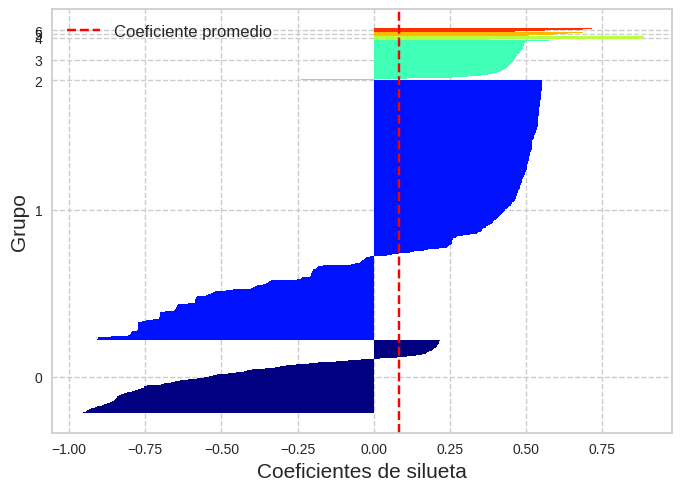

In [ ]:
y_km=dbscan.fit_predict(graph_predictors_scaled)
cluster_labels=np.unique(y_km)
n_clusters=cluster_labels.shape[0]
silhouette_vals=silhouette_samples(graph_predictors_scaled, y_km, metric="euclidean")

y_ax_lower,y_ax_upper=0,0
y_ticks=[]
for i, c in enumerate(cluster_labels):
  c_silhouette_vals=silhouette_vals[y_km==c]
  c_silhouette_vals.sort()
  y_ax_upper+=len(c_silhouette_vals)
  color=cm.jet(float(i)/n_clusters)
  plt.barh(range(y_ax_lower,y_ax_upper),
           c_silhouette_vals,
           height=1.0,
           edgecolor="none",
           color=color)
  y_ticks.append((y_ax_lower + y_ax_upper)/2)
  y_ax_lower+=len(c_silhouette_vals)
silhouette_avg=np.mean(silhouette_vals)
plt.axvline(silhouette_avg,
            color="red",
            linestyle="--",label="Coeficiente promedio")
plt.yticks(y_ticks,cluster_labels+1)
plt.ylabel("Grupo",size=15)
plt.xlabel("Coeficientes de silueta", size=15)
#plt.xlim(0,0.75)
plt.legend(loc="best", prop={"size":12})
plt.grid(linestyle="--")
plt.show()

In [ ]:
#Silhouette score
silhouette_avg

0.08100935250329246

In [ ]:
#Davies Bouldin score
davies_bouldin_score(graph_predictors_scaled, y_km)

1.036759386658067

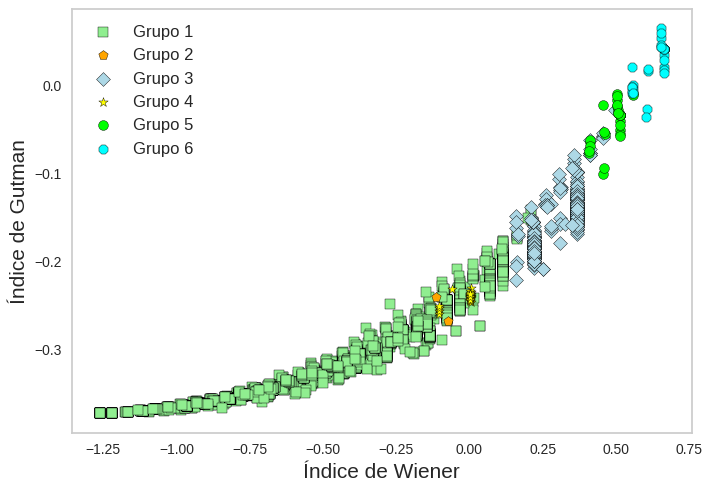

In [ ]:
plt.scatter(graph_predictors_scaled[y_km==0,0],
            graph_predictors_scaled[y_km==0,1],
            s=50, c="lightgreen",
            marker="s",edgecolor="black",
            label="Grupo 1")

plt.scatter(graph_predictors_scaled[y_km==1,0],
            graph_predictors_scaled[y_km==1,1],
            s=50, c="orange",
            marker="p",edgecolor="black",
            label="Grupo 2")


plt.scatter(graph_predictors_scaled[y_km==2,0],
            graph_predictors_scaled[y_km==2,1],
            s=50, c="lightblue",
            marker="D",edgecolor="black",
            label="Grupo 3")


plt.scatter(graph_predictors_scaled[y_km==3,0],
            graph_predictors_scaled[y_km==3,1],
            s=50, c="yellow",
            marker="*",edgecolor="black",
            label="Grupo 4")

plt.scatter(graph_predictors_scaled[y_km==4,0],
            graph_predictors_scaled[y_km==4,1],
            s=50, c="lime",
            marker="o",edgecolor="black",
            label="Grupo 5")

plt.scatter(graph_predictors_scaled[y_km==5,0],
            graph_predictors_scaled[y_km==5,1],
            s=50, c="cyan",
            marker="8",edgecolor="black",
            label="Grupo 6")
"""
plt.scatter(graph_predictors_scaled[y_km==6,0],
            graph_predictors_scaled[y_km==6,1],
            s=50,
            marker="v",edgecolor="black",
            label="Grupo 7")

plt.scatter(graph_predictors_scaled[y_km==7,0],
            graph_predictors_scaled[y_km==7,1],
            s=50,
            marker="s",edgecolor="black",
            label="cluster 8")

plt.scatter(graph_predictors_scaled[y_km==8,0],
            graph_predictors_scaled[y_km==8,1],
            s=50,
            marker="s",edgecolor="black",
            label="cluster 9")


plt.scatter(graph_predictors_scaled[y_km==9,0],
            graph_predictors_scaled[y_km==9,1],
            s=50,
            marker="s",edgecolor="black",
            label="cluster 10")


plt.scatter(km.cluster_centers_[:,1],
            km.cluster_centers_[:,2],
            s=250, marker="*",
            c="red",edgecolor="black",
            label="Centroides")
"""
plt.legend(scatterpoints=1,prop={"size":12})
plt.grid()
plt.xlabel("Índice de Wiener",size=15)
plt.ylabel("Índice de Gutman",size=15)
#plt.xlim(-2,-0.25)
#plt.ylim(-0.4,-0.3)
plt.show()

## **HBSCAN**

In [ ]:
from sklearn.cluster import HDBSCAN
hdbscan = HDBSCAN(min_cluster_size=50).fit(graph_predictors_scaled)
labels=hdbscan.labels_

In [ ]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 12
Estimated number of noise points: 1897


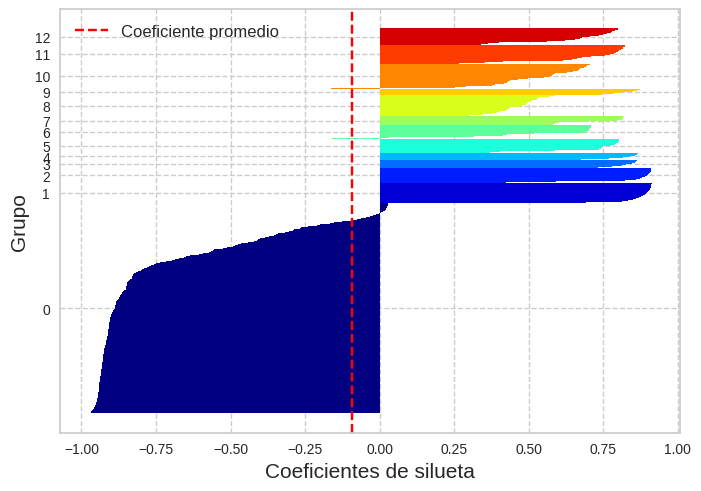

In [ ]:
y_km=hdbscan.fit_predict(graph_predictors_scaled)
cluster_labels=np.unique(y_km)
n_clusters=cluster_labels.shape[0]
silhouette_vals=silhouette_samples(graph_predictors_scaled, y_km, metric="euclidean")

y_ax_lower,y_ax_upper=0,0
y_ticks=[]
for i, c in enumerate(cluster_labels):
  c_silhouette_vals=silhouette_vals[y_km==c]
  c_silhouette_vals.sort()
  y_ax_upper+=len(c_silhouette_vals)
  color=cm.jet(float(i)/n_clusters)
  plt.barh(range(y_ax_lower,y_ax_upper),
           c_silhouette_vals,
           height=1.0,
           edgecolor="none",
           color=color)
  y_ticks.append((y_ax_lower + y_ax_upper)/2)
  y_ax_lower+=len(c_silhouette_vals)
silhouette_avg=np.mean(silhouette_vals)
plt.axvline(silhouette_avg,
            color="red",
            linestyle="--",label="Coeficiente promedio")
plt.yticks(y_ticks,cluster_labels+1)
plt.ylabel("Grupo",size=15)
plt.xlabel("Coeficientes de silueta", size=15)
#plt.xlim(0,0.75)
plt.legend(loc="best", prop={"size":12})
plt.grid(linestyle="--")
plt.show()

In [ ]:
#Silhouette score
silhouette_avg

-0.09414289691372986

In [ ]:
#Davies Bouldin Score
davies_bouldin_score(graph_predictors_scaled, y_km)

2.0875256974921084

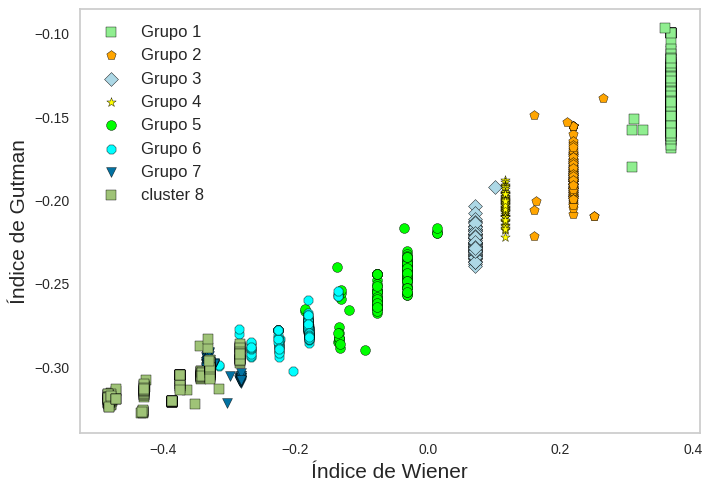

In [ ]:
plt.scatter(graph_predictors_scaled[y_km==0,0],
            graph_predictors_scaled[y_km==0,1],
            s=50, c="lightgreen",
            marker="s",edgecolor="black",
            label="Grupo 1")

plt.scatter(graph_predictors_scaled[y_km==1,0],
            graph_predictors_scaled[y_km==1,1],
            s=50, c="orange",
            marker="p",edgecolor="black",
            label="Grupo 2")


plt.scatter(graph_predictors_scaled[y_km==2,0],
            graph_predictors_scaled[y_km==2,1],
            s=50, c="lightblue",
            marker="D",edgecolor="black",
            label="Grupo 3")


plt.scatter(graph_predictors_scaled[y_km==3,0],
            graph_predictors_scaled[y_km==3,1],
            s=50, c="yellow",
            marker="*",edgecolor="black",
            label="Grupo 4")

plt.scatter(graph_predictors_scaled[y_km==4,0],
            graph_predictors_scaled[y_km==4,1],
            s=50, c="lime",
            marker="o",edgecolor="black",
            label="Grupo 5")

plt.scatter(graph_predictors_scaled[y_km==5,0],
            graph_predictors_scaled[y_km==5,1],
            s=50, c="cyan",
            marker="8",edgecolor="black",
            label="Grupo 6")

plt.scatter(graph_predictors_scaled[y_km==6,0],
            graph_predictors_scaled[y_km==6,1],
            s=50,
            marker="v",edgecolor="black",
            label="Grupo 7")

plt.scatter(graph_predictors_scaled[y_km==7,0],
            graph_predictors_scaled[y_km==7,1],
            s=50,
            marker="s",edgecolor="black",
            label="cluster 8")
"""
plt.scatter(graph_predictors_scaled[y_km==8,0],
            graph_predictors_scaled[y_km==8,1],
            s=50,
            marker="s",edgecolor="black",
            label="cluster 9")


plt.scatter(graph_predictors_scaled[y_km==9,0],
            graph_predictors_scaled[y_km==9,1],
            s=50,
            marker="s",edgecolor="black",
            label="cluster 10")


plt.scatter(km.cluster_centers_[:,1],
            km.cluster_centers_[:,2],
            s=250, marker="*",
            c="red",edgecolor="black",
            label="Centroides")
"""
plt.legend(scatterpoints=1,prop={"size":12})
plt.grid()
plt.xlabel("Índice de Wiener",size=15)
plt.ylabel("Índice de Gutman",size=15)
#plt.xlim(-2,-0.25)
#plt.ylim(-0.4,-0.3)
plt.show()

# **Predictions with Molecular Descriptors**

In [ ]:
data_descriptors=pd.read_csv("/content/drive/MyDrive/Artículo Fernanda Saviñón/Archivos csv/Descriptors.csv")
data_descriptors.head()

Name                                             SMILES  \
0  abietic acid  CC(C)C1=CC2=CC[C@@H]3[C@@]([C@H]2CC1)(CCC[C@@]...   
1  acenaphthene                            C1CC2=CC=CC3=C2C1=CC=C3   
2        acetal                                         CCOC(C)OCC   
3  acetaldehyde                                               CC=O   
4     acetamide                                            CC(=O)N   

   MaxAbsEStateIndex  MaxEStateIndex  MinAbsEStateIndex  MinEStateIndex  \
0          11.942019       11.942019           0.161193       -0.588430   
1           2.248843        2.248843           1.232824        1.232824   
2           5.060000        5.060000           0.037037       -0.037037   
3           8.805556        8.805556           0.750000        0.750000   
4           9.222222        9.222222           0.333333       -0.333333   

        qed        SPS    MolWt  HeavyAtomMolWt  ...  fr_sulfonamd  \
0  0.760294  41.318182  302.458         272.218  ...             0   
1  0.546961  14.000000  154.212         144.132  ...             0   
2  0.519424  10.500000  118.176         104.064  ...             0   
3  0.355008   4.333333   44.053          40.021  ...             0   
4  0.401031   6.250000   59.068          54.028  ...             0   

   fr_sulfone  fr_term_acetylene  fr_tetrazole  fr_thiazole  fr_thiocyan  \
0           0                  0             0            0            0   
1           0                  0             0            0            0   
2           0                  0             0            0            0   
3           0                  0             0            0            0   
4           0                  0             0            0            0   

   fr_thiophene  fr_unbrch_alkane  fr_urea      Enthalpy  
0             0                 0        0  10960.527550  
1             0                 0        0   6013.523824  
2             0                 0        0   3566.534587  
3             0                 0        0   1100.636618  
4             0                 0        0    999.599324  

[5 rows x 213 columns]

In [ ]:
#Data Scaling
descriptors_predictors=data_descriptors.drop(["Name","SMILES","Enthalpy"], axis=1)
scaler=StandardScaler()
scaler.fit(descriptors_predictors)
descriptors_predictors_scaled=scaler.transform(descriptors_predictors)

In [ ]:
len(data_descriptors.columns)

213

<Axes: >

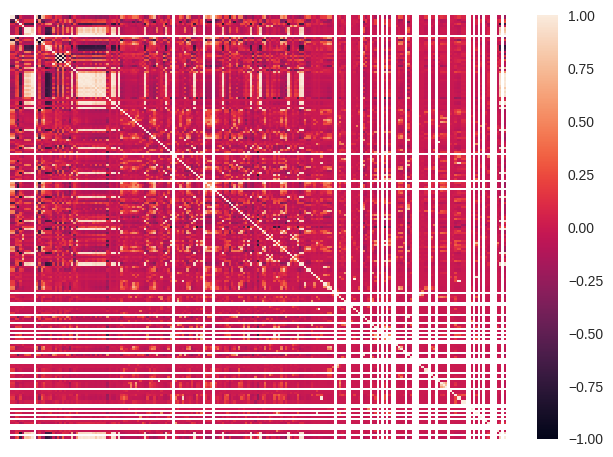

In [ ]:
#No se pueden visualizar porque son 212 descriptores
sns.heatmap(data_descriptors.drop(["Name","SMILES"],axis=1).corr(),vmin=-1,vmax=1,xticklabels=False, yticklabels=False)

## **Unsupervised Learning**

In [ ]:
#Escalamiento
descriptors_predictors=data_descriptors.drop(["Name","SMILES","Enthalpy"], axis=1)
scaler=StandardScaler()
scaler.fit(descriptors_predictors)
descriptors_predictors_scaled=scaler.transform(descriptors_predictors)

#### **Elbow method to find the optimal number of groups**

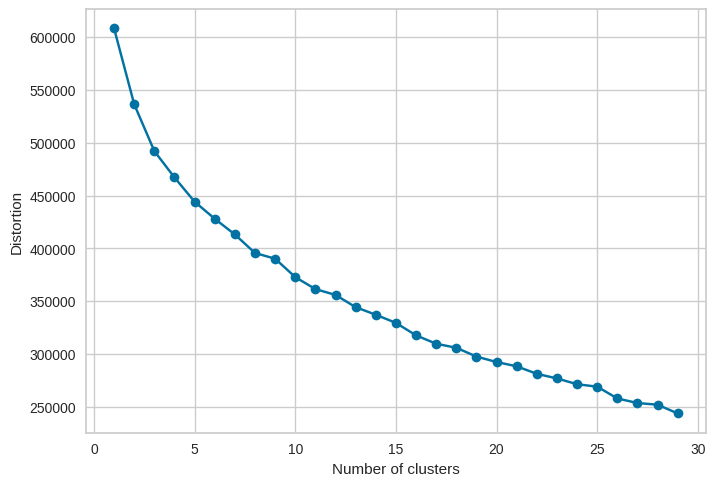

In [ ]:
distortion = []
for i in range(1,30):
  km=KMeans(n_clusters=i,
            init="k-means++",
            n_init=10,
            max_iter=300,
            random_state=0)
  km.fit(descriptors_predictors_scaled)
  distortion.append(km.inertia_)

plt.plot(range(1,30),distortion,marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("Distortion")
plt.show()

#### **Clustering quality using silhouette graphics**

In [ ]:
from matplotlib import cm
km=KMeans(n_clusters=5,
          init="k-means++",
          n_init=30,
          max_iter=300,
          tol=1e-04,
          random_state=0)

y_km=km.fit_predict(descriptors_predictors_scaled)
cluster_labels=np.unique(y_km)
n_clusters=cluster_labels.shape[0]
silhouette_vals=silhouette_samples(descriptors_predictors_scaled, y_km, metric="euclidean")

y_ax_lower,y_ax_upper=0,0
y_ticks=[]
for i, c in enumerate(cluster_labels):
  c_silhouette_vals=silhouette_vals[y_km==c]
  c_silhouette_vals.sort()
  y_ax_upper+=len(c_silhouette_vals)
  color=cm.jet(float(i)/n_clusters)
  plt.barh(range(y_ax_lower,y_ax_upper),
           c_silhouette_vals,
           height=1.0,
           edgecolor="none",
           color=color)
  y_ticks.append((y_ax_lower + y_ax_upper)/2)
  y_ax_lower+=len(c_silhouette_vals)
silhouette_avg=np.mean(silhouette_vals)
plt.axvline(silhouette_avg,
            color="red",
            linestyle="--")
plt.yticks(y_ticks,cluster_labels+1)
plt.ylabel("Cluster")
plt.xlabel("Silhouette coefficients")
plt.show()

In [ ]:
plt.scatter(descriptors_predictors_scaled[y_km==0,0],
            descriptors_predictors_scaled[y_km==0,1],
            s=50, c="lightgreen",
            marker="s",edgecolor="black",
            label="cluster 1")

plt.scatter(descriptors_predictors_scaled[y_km==1,0],
           descriptors_predictors_scaled[y_km==1,1],
            s=50, c="orange",
            marker="s",edgecolor="black",
            label="cluster 2")


plt.scatter(descriptors_predictors_scaled[y_km==2,0],
            descriptors_predictors_scaled[y_km==2,1],
            s=50, c="lightblue",
            marker="s",edgecolor="black",
            label="cluster 3")


plt.scatter(descriptors_predictors_scaled[y_km==3,0],
            descriptors_predictors_scaled[y_km==3,1],
            s=50, c="yellow",
            marker="s",edgecolor="black",
            label="cluster 4")

plt.scatter(descriptors_predictors_scaled[y_km==4,0],
            descriptors_predictors_scaled[y_km==4,1],
            s=50, c="lime",
            marker="s",edgecolor="black",
            label="cluster 5")

plt.scatter(km.cluster_centers_[:,0],
            km.cluster_centers_[:,1],
            s=250, marker="*",
            c="red",edgecolor="black",
            label="centroids")

plt.legend(scatterpoints=1)
plt.grid()
plt.show()

# **Supervised Learning**

## **Multiple models of Machine Learning**

In [ ]:
data_descriptors=pd.read_csv("/content/drive/MyDrive/Artículo Fernanda Saviñón/Archivos csv/All_molecularDescriptors.csv")
data_descriptors.head()

MaxAbsEStateIndex  MaxEStateIndex  MinAbsEStateIndex  MinEStateIndex  \
0          11.942019       11.942019           0.161193       -0.588430   
1           2.248843        2.248843           1.232824        1.232824   
2           5.060000        5.060000           0.037037       -0.037037   
3           8.805556        8.805556           0.750000        0.750000   
4           9.222222        9.222222           0.333333       -0.333333   

        qed        SPS    MolWt  HeavyAtomMolWt  ExactMolWt  \
0  0.760294  41.318182  302.458         272.218  302.224580   
1  0.546961  14.000000  154.212         144.132  154.078250   
2  0.519424  10.500000  118.176         104.064  118.099380   
3  0.355008   4.333333   44.053          40.021   44.026215   
4  0.401031   6.250000   59.068          54.028   59.037114   

   NumValenceElectrons  ...  fr_term_acetylene  fr_tetrazole  fr_thiazole  \
0                  122  ...                  0             0            0   
1                   58  ...                  0             0            0   
2                   50  ...                  0             0            0   
3                   18  ...                  0             0            0   
4                   24  ...                  0             0            0   

   fr_thiocyan  fr_thiophene  fr_unbrch_alkane  fr_urea          Name  \
0            0             0                 0        0  abietic acid   
1            0             0                 0        0  acenaphthene   
2            0             0                 0        0        acetal   
3            0             0                 0        0  acetaldehyde   
4            0             0                 0        0     acetamide   

                                              SMILES      Entalpia  
0  CC(C)C1=CC2=CC[C@@H]3[C@@]([C@H]2CC1)(CCC[C@@]...  10960.527550  
1                            C1CC2=CC=CC3=C2C1=CC=C3   6013.523824  
2                                         CCOC(C)OCC   3566.534587  
3                                               CC=O   1100.636618  
4                                            CC(=O)N    999.599324  

[5 rows x 213 columns]

In [ ]:
#Data Scaling
descriptors_predictors=data_descriptors.drop(["Name","SMILES","Entalpia"], axis=1)
scaler=StandardScaler()
scaler.fit(descriptors_predictors)
descriptors_predictors_scaled=scaler.transform(descriptors_predictors)

In [ ]:
descriptors_predictors_scaled=pd.DataFrame(descriptors_predictors_scaled, columns=descriptors_predictors.columns)
descriptors_predictors_scaled

MaxAbsEStateIndex  MaxEStateIndex  MinAbsEStateIndex  MinEStateIndex  \
0              1.819539        1.819539          -1.058856       -0.971952   
1             -1.000253       -1.000253           1.127602        0.899437   
2             -0.182473       -0.182473          -1.312173       -0.405381   
3              0.907127        0.907127           0.142492        0.403321   
4              1.028337        1.028337          -0.707637       -0.709833   
...                 ...             ...                ...             ...   
3472           1.736935        1.736935          -1.288086       -1.198480   
3473           1.418872        1.418872          -0.636415       -1.779604   
3474           1.491658        1.491658          -0.654551       -1.269455   
3475           1.442118        1.442118          -0.710093       -1.275208   
3476           1.479201        1.479201          -0.592964       -1.510353   

           qed       SPS     MolWt  HeavyAtomMolWt  ExactMolWt  \
0     2.078194  4.336715  1.203695        1.223494    1.206228   
1     0.548934  0.122848 -0.233943       -0.160376   -0.232812   
2     0.351542 -0.417031 -0.583407       -0.593280   -0.582298   
3    -0.827065 -1.368248 -1.302226       -1.285215   -1.301818   
4    -0.497151 -1.072600 -1.156616       -1.133880   -1.156008   
...        ...       ...       ...             ...         ...   
3472  0.861330 -0.571283  0.716524        0.876765    0.718980   
3473  1.496083 -0.555858  0.308437        0.487456    0.310551   
3474  1.769337 -0.470426 -0.059667        0.055568   -0.058218   
3475  1.769337 -0.470426 -0.059667        0.055568   -0.058218   
3476  2.059747 -0.185654  0.153711        0.271512    0.155536   

      NumValenceElectrons  ...  fr_sulfide  fr_sulfonamd  fr_sulfone  \
0                1.404242  ...   -0.131383           0.0   -0.033937   
1               -0.231573  ...   -0.131383           0.0   -0.033937   
2               -0.436050  ...   -0.131383           0.0   -0.033937   
3               -1.253957  ...   -0.131383           0.0   -0.033937   
4               -1.100599  ...   -0.131383           0.0   -0.033937   
...                   ...  ...         ...           ...         ...   
3472             0.739692  ...   -0.131383           0.0   -0.033937   
3473             0.279619  ...   -0.131383           0.0   -0.033937   
3474            -0.078215  ...   -0.131383           0.0   -0.033937   
3475            -0.078215  ...   -0.131383           0.0   -0.033937   
3476             0.177381  ...   -0.131383           0.0   -0.033937   

      fr_term_acetylene  fr_tetrazole  fr_thiazole  fr_thiocyan  fr_thiophene  \
0             -0.123217           0.0          0.0          0.0     -0.067992   
1             -0.123217           0.0          0.0          0.0     -0.067992   
2             -0.123217           0.0          0.0          0.0     -0.067992   
3             -0.123217           0.0          0.0          0.0     -0.067992   
4             -0.123217           0.0          0.0          0.0     -0.067992   
...                 ...           ...          ...          ...           ...   
3472          -0.123217           0.0          0.0          0.0     -0.067992   
3473          -0.123217           0.0          0.0          0.0     -0.067992   
3474          -0.123217           0.0          0.0          0.0     -0.067992   
3475          -0.123217           0.0          0.0          0.0     -0.067992   
3476          -0.123217           0.0          0.0          0.0     -0.067992   

      fr_unbrch_alkane  fr_urea  
0            -0.484652      0.0  
1            -0.484652      0.0  
2            -0.484652      0.0  
3            -0.484652      0.0  
4            -0.484652      0.0  
...                ...      ...  
3472         -0.484652      0.0  
3473         -0.484652      0.0  
3474         -0.484652      0.0  
3475         -0.484652      0.0  
3476         -0.484652      0.0  

[3477 rows x 210 columns]

In [ ]:
reg = setup(descriptors_predictors_scaled, target = data_descriptors.Entalpia, session_id=123, train_size=0.7, log_experiment=True, experiment_name='Enthalpypredictions')

In [ ]:
best_model = compare_models(cross_validation=True)

Processing:   0%|          | 0/81 [00:00<?, ?it/s]

2024/11/17 03:41:09 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/11/17 03:41:10 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/11/17 03:41:10 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/11/17 03:41:11 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/11/17 03:41:11 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/11/17 03:41:12 

In [ ]:
rf = create_model('rf', cross_validation=True, return_train_score=True)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

2024/11/17 03:44:28 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


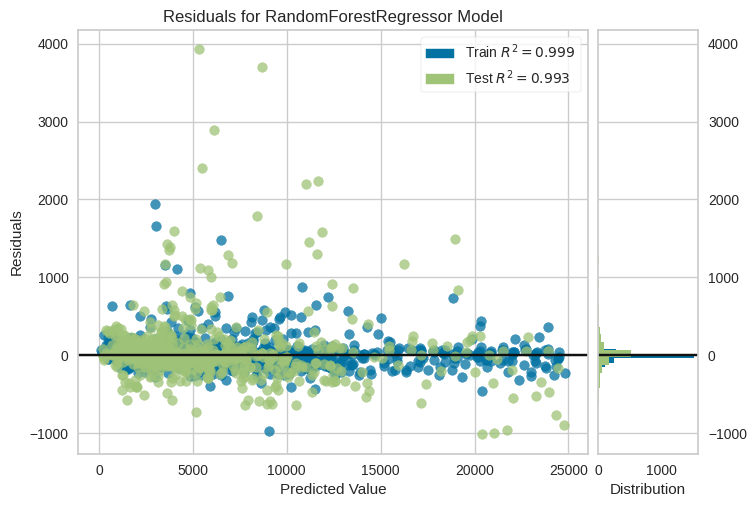

In [ ]:
reg.plot_model(rf, plot='residuals')

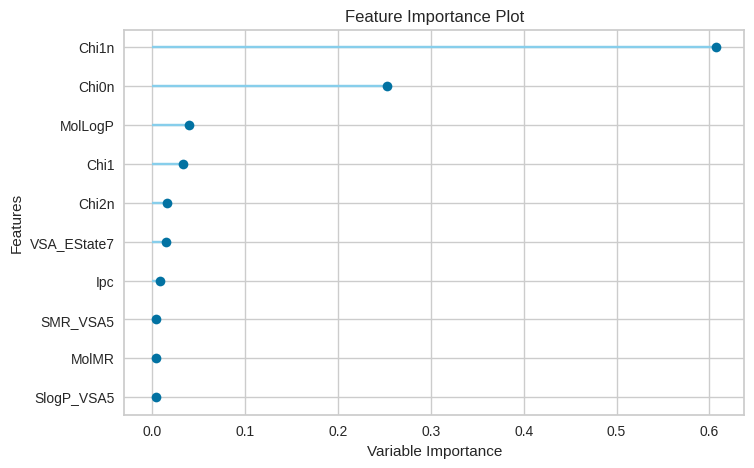

In [ ]:
reg.plot_model(rf, plot='feature')

In [ ]:
tuned_rf = tune_model(rf, n_iter=30, optimize = 'R2', fold=5, return_train_score=True)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 30 candidates, totalling 150 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


2024/11/17 05:07:58 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [ ]:
reg.predict_model(tuned_rf)

MaxAbsEStateIndex  MaxEStateIndex  MinAbsEStateIndex  MinEStateIndex  \
2653          -0.987312       -0.987312           1.188699        0.930206   
1006          -0.952590       -0.952590           0.532606        0.599789   
1724          -0.944483       -0.944483          -0.343782        0.158427   
554           -0.013607       -0.013607          -1.075184       -0.524732   
85            -0.654857       -0.654857           0.454206        0.560305   
...                 ...             ...                ...             ...   
3236          -1.014731       -1.014731           1.397471        1.035346   
2963          -0.651605       -0.651605          -0.556503        0.051298   
1049          -0.964531       -0.964531           0.391157        0.528553   
3429           1.293720        1.293720          -0.691894       -1.048957   
2867          -0.968940       -0.968940           0.307606        0.486475   

           qed       SPS     MolWt  HeavyAtomMolWt  ExactMolWt  \
2653 -1.286338 -0.346917  1.204548        1.137320    1.206935   
1006  0.369627  0.431351 -0.077539       -0.160376   -0.076178   
1724 -0.157995 -0.185654  0.191153        0.302337    0.193736   
554  -0.948853 -0.317870  0.590532        0.605708    0.583592   
85    0.669369 -0.450085 -0.128607       -0.075692   -0.136241   
...        ...       ...       ...             ...         ...   
3236  0.673443 -0.387368 -0.078364       -0.030606   -0.077090   
2963  1.544362  0.277100  1.129546        1.391370    1.105062   
1049  0.243028  0.108825 -0.213568       -0.290146   -0.212321   
3429  0.718986 -0.481303 -0.058842       -0.074201   -0.057306   
2867  0.677048  0.739854 -0.349597       -0.419915   -0.348464   

      NumValenceElectrons  ...  fr_sulfone  fr_term_acetylene  fr_tetrazole  \
2653             1.506480  ...   -0.033937          -0.123217           0.0   
1006             0.177381  ...   -0.033937          -0.123217           0.0   
1724            -0.742765  ...   -0.033937          -0.123217           0.0   
554              0.484096  ...   -0.033937          -0.123217           0.0   
85              -0.589407  ...   -0.033937          -0.123217           0.0   
...                   ...  ...         ...                ...           ...   
3236            -0.027096  ...   -0.033937          -0.123217           0.0   
2963            -0.589407  ...   -0.033937          -0.123217           0.0   
1049             0.024023  ...   -0.033937          -0.123217           0.0   
3429             0.126262  ...   -0.033937          -0.123217           0.0   
2867            -0.129334  ...   -0.033937          -0.123217           0.0   

      fr_thiazole  fr_thiocyan  fr_thiophene  fr_unbrch_alkane  fr_urea  \
2653          0.0          0.0     -0.067992          1.380864      0.0   
1006          0.0          0.0     -0.067992         -0.197650      0.0   
1724          0.0          0.0     -0.067992         -0.484652      0.0   
554           0.0          0.0     -0.067992          0.663358      0.0   
85            0.0          0.0     -0.067992         -0.484652      0.0   
...           ...          ...           ...               ...      ...   
3236          0.0          0.0     -0.067992         -0.484652      0.0   
2963          0.0          0.0     -0.067992         -0.484652      0.0   
1049          0.0          0.0     -0.067992         -0.054148      0.0   
3429          0.0          0.0     -0.067992          0.376355      0.0   
2867          0.0          0.0     -0.067992         -0.484652      0.0   

          Entalpia  prediction_label  
2653  12898.884766      12568.376748  
1006   7527.243164       7527.293257  
1724   3145.508545       3203.639609  
554    7230.343750       7267.303394  
85     3729.808350       3727.376724  
...            ...               ...  
3236   6806.784668       6804.462549  
2963   2266.634766       2289.183799  
1049   6914.451660       6914.457891  
3429   6079.299805       5792.988782

In [ ]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
np.sort(tuned_rf.feature_importances_)

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 6.08306458e-11, 1.09013865e-09, 2.66715778e-09,
       2.72750817e-09, 7.42426081e-09, 1.07115243e-08, 1.49150052e-08,
       2.46259440e-08, 2.92966504e-08, 3.88655093e-08, 4.94530910e-08,
       5.77453767e-08, 5.84238474e-08, 6.32615168e-08, 1.21215710e-07,
       1.36679453e-07, 1.41314520e-07, 1.55685295e-07, 1.71047505e-07,
       2.89383117e-07, 3.19795067e-07, 3.41588109e-07, 3.86844234e-07,
      

In [ ]:
y_predict_train=tuned_rf.predict(reg.train.drop(["Entalpia"],axis=1))
y_predict_test=tuned_rf.predict(reg.test.drop(["Entalpia"],axis=1))
y_train=reg.train.Entalpia
y_test=reg.test.Entalpia

In [ ]:
#R2 Train
r2_score(y_train,y_predict_train)

0.9991727214365708

In [ ]:
#R2 Test
r2_score(y_test,y_predict_test)

0.9927059132319542

In [ ]:
#MAE Train
mean_absolute_error(y_train,y_predict_train)

51.58548359819398

In [ ]:
#MAE Test
mean_absolute_error(y_test,y_predict_test)

142.22721380862464

In [ ]:
#MAPE Train
mean_absolute_percentage_error(y_train,y_predict_train)

0.024346533287433456

In [ ]:
#MAPE Test
mean_absolute_percentage_error(y_test,y_predict_test)

0.04846247912157264

In [ ]:
#RMSE Train
mean_squared_error(y_train,y_predict_train, squared=False)

122.18679272829263

In [ ]:
#RMSE Test
mean_squared_error(y_test,y_predict_test, squared=False)

342.0464953669828

In [ ]:
#RMSLE Train
root_mean_squared_log_error(y_train,y_predict_train)

0.0855445748839551

In [ ]:
#RMSLE Test
root_mean_squared_log_error(y_test,y_predict_test)

0.11725606700848379

<Figure size 600x500 with 0 Axes>

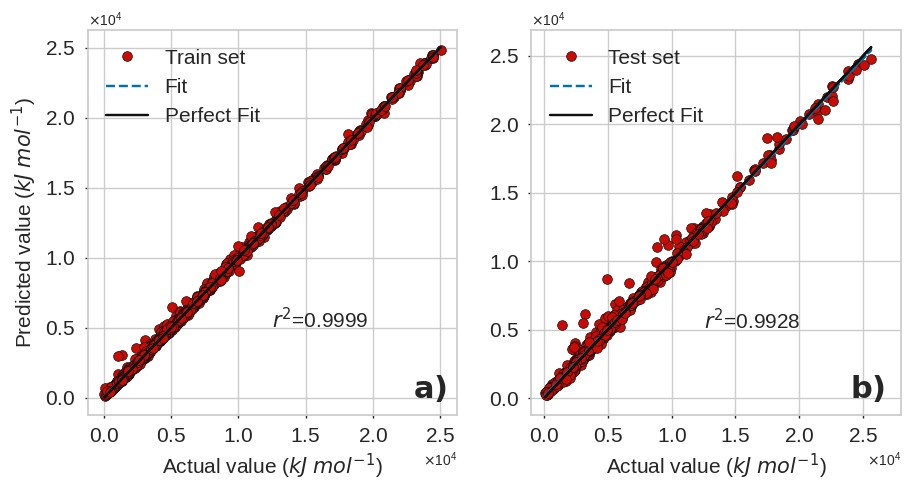

In [ ]:
"""
We make the parity plot
"""
reg_train=linregress(y_train,y_predict_train)
plt.figure(figsize=(6,5))
f, axes= plt.subplots(1,2, figsize=(10.5,5))
axes[0].text(23000,0, r"$\mathbf{a)}$",size=22)
axes[0].tick_params(labelsize=15, length=2)
axes[0].plot(y_train,y_predict_train,"ro", markeredgecolor="k", markeredgewidth=0.5, label="Train set")
axes[0].plot(y_train,reg_train.intercept+reg_train.slope*y_train, "b--", label="Fit")
axes[0].plot(y_train,y_train,"k-", label="Perfect Fit")
axes[0].set_xlabel(r"Actual value ($kJ$ $mol^{-1}$)", size=15)
axes[0].set_ylabel("Predicted value ($kJ$ $mol^{-1}$)",size=15)
axes[0].set_xticks(np.arange(0, 28000, 5000))
axes[1].set_xlim(-1000,28000)
axes[0].legend(loc="best", prop={"size":15}, frameon=False)
axes[0].text(12500,5000, r"$r^2$={}".format(0.9999), size=15)
axes[0].grid(visible=True)
axes[0].tick_params(axis='x')
axes[0].xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
axes[0].yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
axes[0].ticklabel_format(style='scientific', axis='both', scilimits=(0, 0))
#Realizamos el gráfico de paridad para el conjunto de prueba
axes[1].text(24000,0, r"$\mathbf{b)}$",size=22)
axes[1].tick_params(labelsize=15, length=2)
reg_test=linregress(y_test,y_predict_test)
axes[1].plot(y_test,y_predict_test,"ro",markeredgecolor="k", markeredgewidth=0.5, label="Test set")
axes[1].plot(y_test,reg_test.intercept+reg_test.slope*y_test, "b--", label="Fit")
axes[1].plot(y_test,y_test,"k-", label="Perfect Fit")
axes[1].set_xlabel(r"Actual value ($kJ$ $mol^{-1}$)", size=15)
#axes[1].set_ylabel("Predicted value ($kJ$ $mol^{-1}$)",size=15)
axes[1].legend(loc="best", prop={"size":15}, frameon=False)
axes[1].text(12500,5000, r"$r^2$={}".format(round(reg_test.rvalue**2,4)), size=15)
axes[1].grid(visible=True)
axes[1].set_xticks(np.arange(0, 35000, 5000))
axes[1].set_xlim(-1000,28000)
axes[1].tick_params(axis='x')
plt.savefig("KNNDescriptorsPredictors.png", dpi=500, bbox_inches='tight', pad_inches=0.1)
axes[1].xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
axes[1].yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
axes[1].ticklabel_format(style='scientific', axis='both', scilimits=(0, 0))
plt.show()

In [ ]:
Correlacion=pd.concat([data_descriptors.drop(["Name","SMILES", "Entalpia"],axis=1),data_graphs.drop(["Name","SMILES","Estado", "Enthalpy"], axis=1)],axis=1)
Correlacion.to_csv("CorrTot.csv")

In [ ]:
Correlacion

MaxAbsEStateIndex  MaxEStateIndex  MinAbsEStateIndex  MinEStateIndex  \
0             11.942019       11.942019           0.161193       -0.588430   
1              2.248843        2.248843           1.232824        1.232824   
2              5.060000        5.060000           0.037037       -0.037037   
3              8.805556        8.805556           0.750000        0.750000   
4              9.222222        9.222222           0.333333       -0.333333   
...                 ...             ...                ...             ...   
3472          11.658063       11.658063           0.048843       -0.808889   
3473          10.564705       10.564705           0.368241       -1.374444   
3474          10.814911       10.814911           0.359352       -0.877963   
3475          10.644614       10.644614           0.332130       -0.883562   
3476          10.772087       10.772087           0.389537       -1.112407   

           qed        SPS    MolWt  HeavyAtomMolWt  ExactMolWt  \
0     0.760294  41.318182  302.458         272.218  302.224580   
1     0.546961  14.000000  154.212         144.132  154.078250   
2     0.519424  10.500000  118.176         104.064  118.099380   
3     0.355008   4.333333   44.053          40.021   44.026215   
4     0.401031   6.250000   59.068          54.028   59.037114   
...        ...        ...      ...             ...         ...   
3472  0.590540   9.500000  252.222         240.126  252.063388   
3473  0.679089   9.600000  210.141         204.093  210.016438   
3474  0.717208  10.153846  172.183         164.119  172.052429   
3475  0.717208  10.153846  172.183         164.119  172.052429   
3476  0.757721  12.000000  194.186         184.106  194.057909   

      NumValenceElectrons  ...  fr_thiophene  fr_unbrch_alkane  fr_urea  \
0                     122  ...             0                 0        0   
1                      58  ...             0                 0        0   
2                      50  ...             0                 0        0   
3                      18  ...             0                 0        0   
4                      24  ...             0                 0        0   
...                   ...  ...           ...               ...      ...   
3472                   96  ...             0                 0        0   
3473                   78  ...             0                 0        0   
3474                   64  ...             0                 0        0   
3475                   64  ...             0                 0        0   
3476                   74  ...             0                 0        0   

        Degree       Bet     Eigen     Closs     Estrada  Wiener  Gutman  
0     2.076923  0.087089  0.106051  0.193297  133.219993    7100   26048  
1     2.181818  0.123160  0.187248  0.297329   56.953140     800    3203  
2     1.909091  0.154329  0.187516  0.253346   52.650084     944    2873  
3     1.714286  0.200000  0.350527  0.522632   15.326358      42      90  
4     1.777778  0.198413  0.304505  0.436147   20.109140      86     208  
...        ...       ...       ...       ...         ...     ...     ...  
3472  2.000000  0.143350  0.145638  0.208380   72.339226    2181    7512  
3473  2.000000  0.153383  0.184455  0.266625   49.933973     822    2751  
3474  2.095238  0.140852  0.191581  0.281897   51.895940     772    2864  
3475  2.095238  0.145363  0.191504  0.275725   51.895928     790    2948  
3476  2.000000  0.137352  0.172719  0.258342   57.933268    1110    3734  

[3477 rows x 217 columns]

In [ ]:
pd.set_option('display.max_columns', None)
Correlacion.corr()

MaxAbsEStateIndex  MaxEStateIndex  MinAbsEStateIndex  \
MaxAbsEStateIndex           1.000000        1.000000          -0.548414   
MaxEStateIndex              1.000000        1.000000          -0.548414   
MinAbsEStateIndex          -0.548414       -0.548414           1.000000   
MinEStateIndex             -0.717760       -0.717760           0.368598   
qed                         0.109194        0.109194          -0.252475   
...                              ...             ...                ...   
Eigen                       0.152627        0.152627           0.051585   
Closs                       0.109177        0.109177           0.005723   
Estrada                    -0.147482       -0.147482           0.132462   
Wiener                     -0.092593       -0.092593           0.162712   
Gutman                     -0.092667       -0.092667           0.164070   

                   MinEStateIndex       qed       SPS     MolWt  \
MaxAbsEStateIndex       -0.717760  0.109194 -0.122395 -0.157756   
MaxEStateIndex          -0.717760  0.109194 -0.122395 -0.157756   
MinAbsEStateIndex        0.368598 -0.252475 -0.018699  0.113836   
MinEStateIndex           1.000000 -0.176127  0.012206  0.121425   
qed                     -0.176127  1.000000  0.089158 -0.624033   
...                           ...       ...       ...       ...   
Eigen                   -0.236617  0.286701 -0.108289 -0.535402   
Closs                   -0.237292  0.383610  0.039812 -0.599514   
Estrada                  0.225222 -0.650480 -0.002412  0.813058   
Wiener                   0.163973 -0.675835 -0.053878  0.772034   
Gutman                   0.162974 -0.670969 -0.053058  0.767232   

                   HeavyAtomMolWt  ExactMolWt  NumValenceElectrons  \
MaxAbsEStateIndex       -0.149535   -0.157442            -0.069544   
MaxEStateIndex          -0.149535   -0.157442            -0.069544   
MinAbsEStateIndex        0.107865    0.114202             0.116142   
MinEStateIndex           0.096494    0.121899             0.128741   
qed                     -0.596041   -0.624601            -0.651190   
...                           ...         ...                  ...   
Eigen                   -0.473260   -0.537088            -0.753196   
Closs                   -0.540339   -0.601160            -0.810563   
Estrada                  0.754407    0.814242             0.984222   
Wiener                   0.728883    0.772732             0.880735   
Gutman                   0.724740    0.767921             0.874365   

                   NumRadicalElectrons  MaxPartialCharge  MinPartialCharge  \
MaxAbsEStateIndex                  NaN          0.784810         -0.804762   
MaxEStateIndex                     NaN          0.784810         -0.804762   
MinAbsEStateIndex                  NaN         -0.367340          0.495994   
MinEStateIndex                     NaN         -0.772706          0.428294   
qed                                NaN          0.051399         -0.219239   
...                                ...               ...               ...   
Eigen                              NaN          0.259911         -0.086514   
Closs                              NaN          0.185017         -0.043560   
Estrada                            NaN         -0.204967          0.156713   
Wiener                             NaN         -0.126090          0.131947   
Gutman                             NaN         -0.124593          0.131776   

                   MaxAbsPartialCharge  MinAbsPartialCharge  FpDensityMorgan1  \
MaxAbsEStateIndex             0.835690             0.705281          0.230891   
MaxEStateIndex                0.835690             0.705281          0.230891   
MinAbsEStateIndex            -0.466916            -0.357125         -0.264440   
MinEStateIndex               -0.544523            -0.622615         -0.185635   
qed                           0.213378             0.053176          0.427605   
...                                ...           

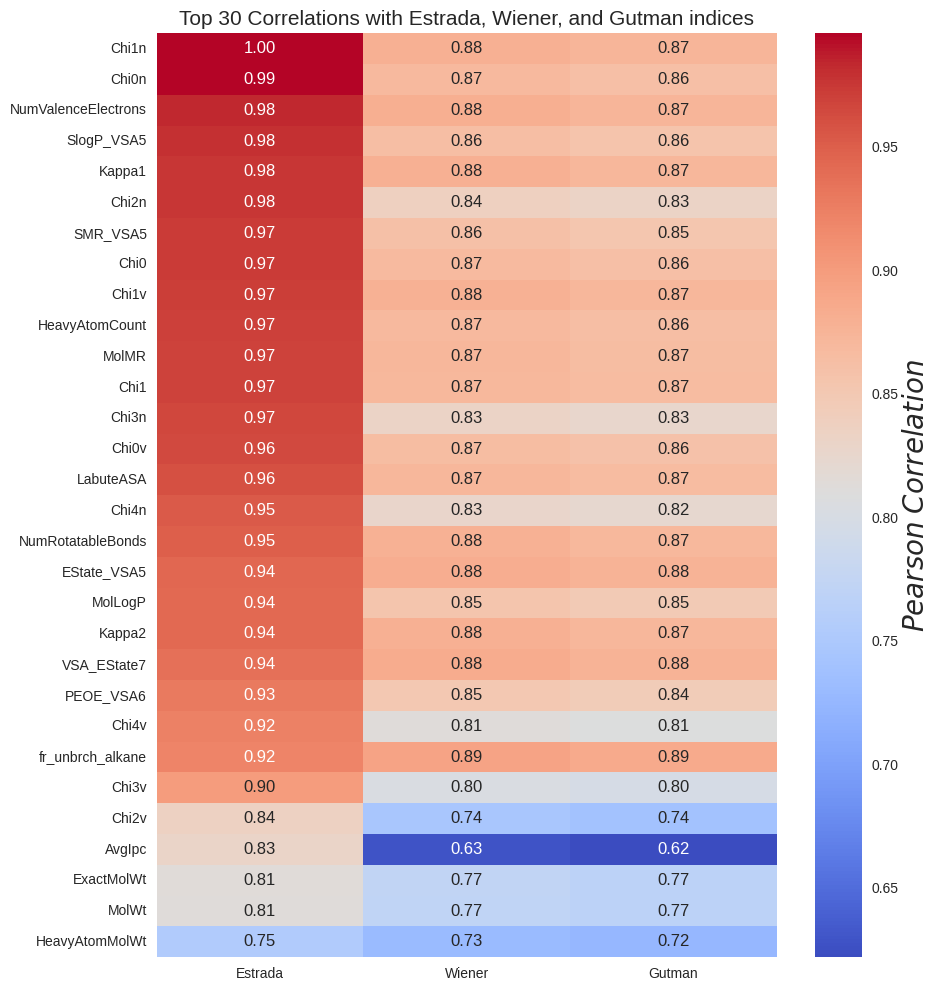

In [ ]:
"""
Here we correlate the topological indices with the molecular descriptors.
"""
data = Correlacion
target_columns = ['Estrada', 'Wiener', 'Gutman']
correlation_matrix = data.corr()
correlations = correlation_matrix[target_columns].abs()
strongest_correlations = correlations.sort_values(by=target_columns, ascending=False)
variables_to_exclude = ['Estrada', 'Degree', 'Bet', 'Eigen', 'Closs', 'Wiener', 'Gutman']
top_correlated_vars_filtered = strongest_correlations.drop(index=variables_to_exclude).head(30).index
correlation_submatrix_filtered = correlation_matrix.loc[top_correlated_vars_filtered, target_columns]
plt.figure(figsize=(10, 12))
ax=sns.heatmap(correlation_submatrix_filtered, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
ax.set_title("Top 30 Correlations with Estrada, Wiener, and Gutman indices", size=15)
ax.figure.axes[-1].set_ylabel(r'$Pearson$ $Correlation$', size=20)
plt.savefig("CorrelationTot.png", dpi=500, bbox_inches='tight', pad_inches=0.1)
plt.show()


# **Supplementary information**

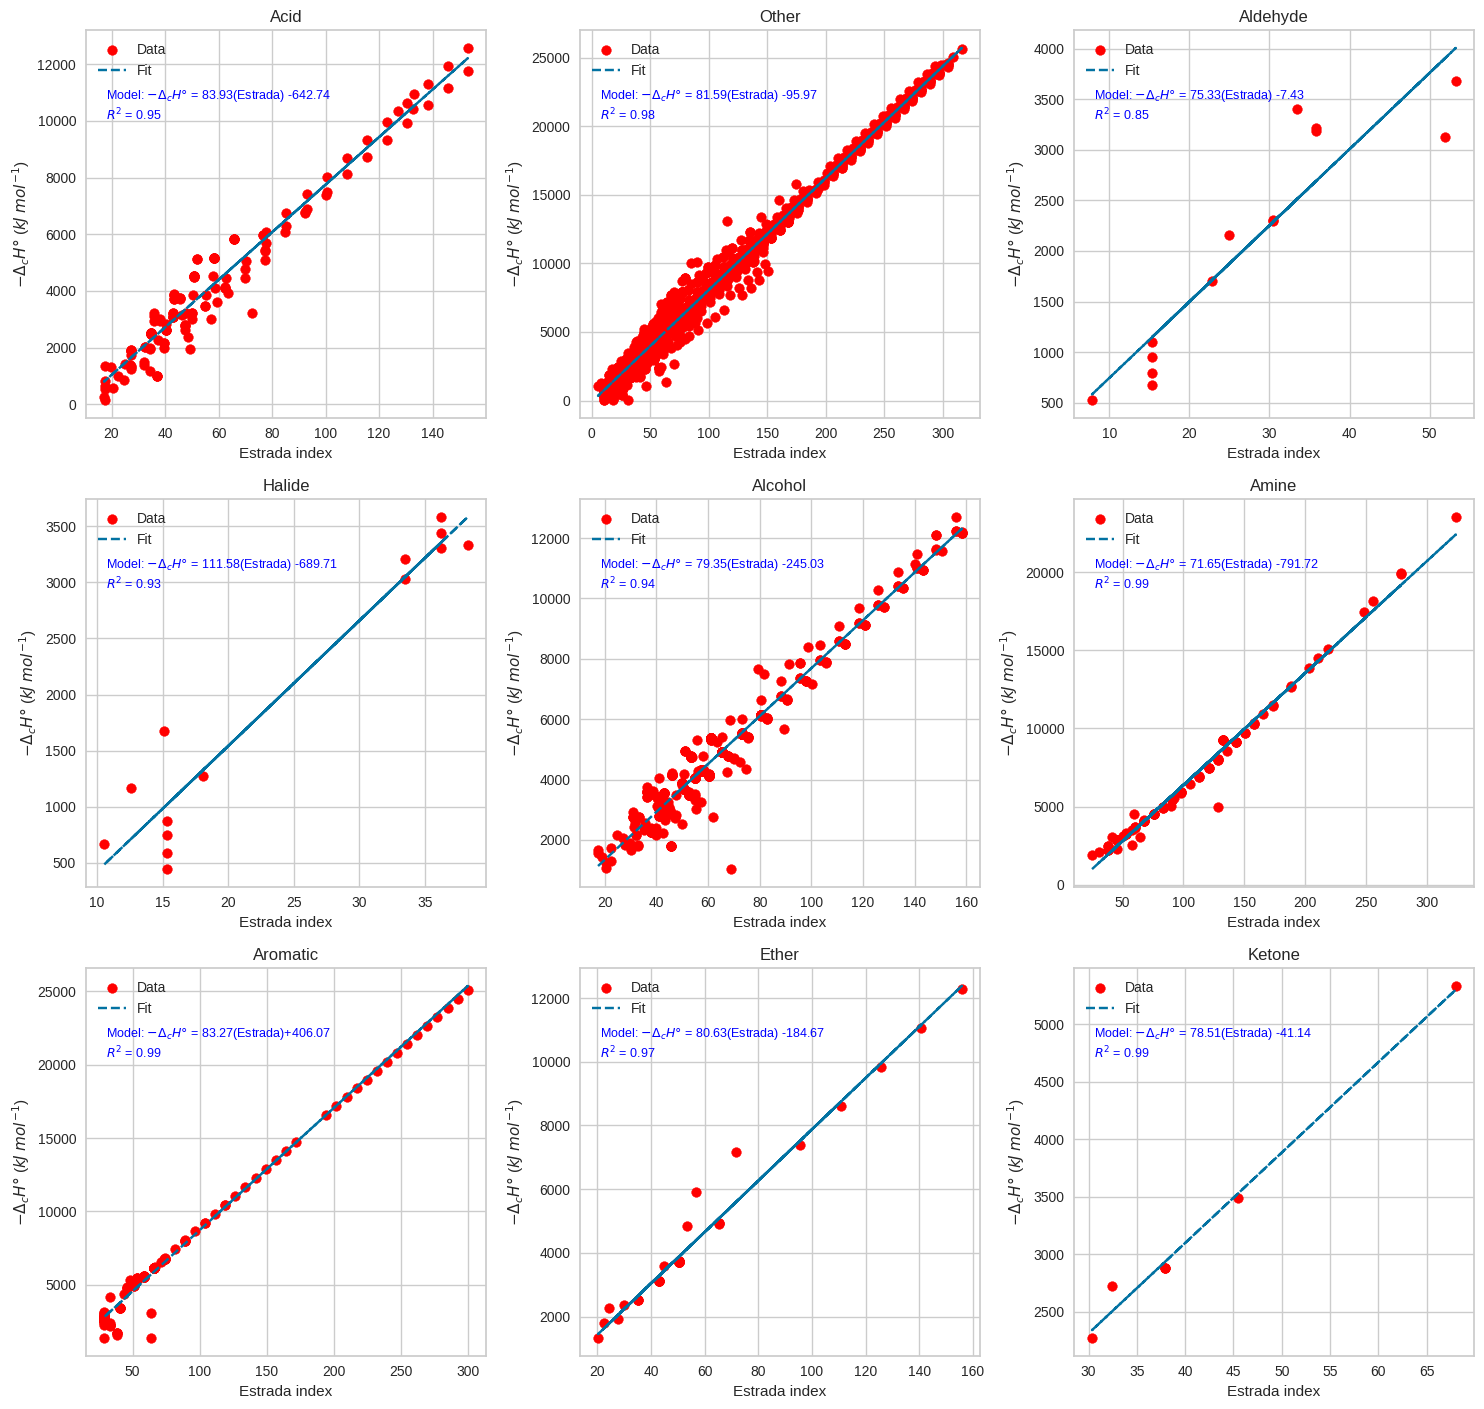

In [15]:
data = pd.read_excel("/content/drive/MyDrive/Artículo Índices Topológicos JCIM 2025/Archivos csv/All_with_families.xlsx")

#Filter data that has valid enthalpy and Estrada values
data = data.dropna(subset=['Enthalpy', 'Estrada'])

#Get the unique families and calculate the grid size
families = data['Family'].unique()
num_families = len(families)
grid_size = math.ceil(math.sqrt(num_families))

fig, axs = plt.subplots(grid_size, grid_size, figsize=(15, 15))

#We iterate over each family and add the graph to the corresponding subplot
for i, family in enumerate(families):
    row = i // grid_size
    col = i % grid_size
    ax = axs[row, col]
    family_data = data[data['Family'] == family]
    ax.scatter(family_data['Estrada'], family_data['Enthalpy'], color="red",label='Data')
    x = family_data[['Estrada']].values
    y = family_data["Enthalpy"].values
    model = LinearRegression()
    model.fit(x, y)
    y_pred = model.predict(x)
    r2 = r2_score(y, y_pred)
    ax.plot(x, y_pred, "b--", label=f'Fit')
    coef = model.coef_[0]
    intercept = model.intercept_
    if intercept < 0:
        equation_text = f'Model: $-\Delta_cH°$ = {coef:.2f}(Estrada) {intercept:.2f}\n$R^2$ = {r2:.2f}'
    else:
      equation_text = f'Model: $-\Delta_cH°$ = {coef:.2f}(Estrada)+{intercept:.2f}\n$R^2$ = {r2:.2f}'
    ax.text(0.05, 0.85, equation_text, transform=ax.transAxes, fontsize=9, verticalalignment='top', color='blue')
    ax.set_title(family)
    ax.set_xlabel('Estrada index')
    ax.set_ylabel(r"$-\Delta_cH°$ ($kJ$ $mol^{-1}$)")
    ax.grid(True)
    ax.legend()

for j in range(i + 1, grid_size * grid_size):
    fig.delaxes(axs[j // grid_size, j % grid_size])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("FigureS2-SI.png",dpi=300)
plt.show()